# Separating Gamma & Hadron Particles

## **Case Study**

Our customer, The Atacama Telescope Gamma Perceptability Project (ATGPP), operates three Imaging Atmospheric Cherenkov Telescopes (IACT) for the observation of gamma rays from galactic and extragalactic sources. These telescopes are not only sensitive to gamma rays. The ATGPP has contracted us to explore the feasibility of separating noise in the form of hadron particle data from gamma rays, the target of their studies. 
<br /><br />
The data provided was generated by the Monte Carlo program Corsika, described in: D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, [Forschungszentrum Karlsruhe FZKA 6019 (1998)](https://www.iap.kit.edu/corsika/70.php). The ATGPP notes that, for technical reasons, the number of hadron events is underrepresented in this generated dataset. Typically, the hadron class represents the majority of the collected events. They otherwise maintain that the provided dataset accurately represents the data they collect from the IACT telescopes. They are confident that, with consideration for the underrepresented hadron class, an effective model on this dataset will likely be suitable for classifying actual observations.
<br /><br />
In discussing their priorities for separating the data, The ATGPP informs us that classifying a background event as a signal is worse than classifying a signal event as background. They also indicate that the relevant thresholds for accepting a background event misclassified as a signal are as follows: 0.01, 0.02, 0.05, 0.1, 0.2—depending on the required quality of the sample of the accepted events for different experiments.

## <b>1. Aims, Objectives, & Plan</b>

### 1.1 Aims & Objectives 
Our Customer, The Atacama Telescope Gamma Perceptability Project, has contracted us to separate observations that represent gamma rays from observations of hadron particles. Particularly, our goal is to identify gamma particles among a proportionally larger number of hadron particles. The ATGPP has provided a generated dataset that, with one exception, is representative of the real-world data they collect. Each observation is labeled "g" or "h" for "gamma" or "hadron", respectively. 

Assigning "gamma" to our positive class, The ATGPP has expressed that incidents of false positives, the classification of a hadron particle as gamma, are more problematic than false negatives. 
<br />
<br />
**Objectives**
1. Explore the relationships between our given features and the classes, gamma and hadron, they represent.
2. Construct candidate machine learning models with >= .8 Precision scores—ensuring we have a false positive threshold below .2.
3. Recommend a model that best addresses the needs of the ATGPP.

###  1.2 Plan 
Click "Enlarge Image" to read the provided Gantt Chart more clearly, outlining the relative amount of time spent on each stage of this project.

[Enlarge Image](https://drive.google.com/file/d/1htDscVe8tMAH7cj2ur5s_PlRP3arScjk/view?usp=sharing)

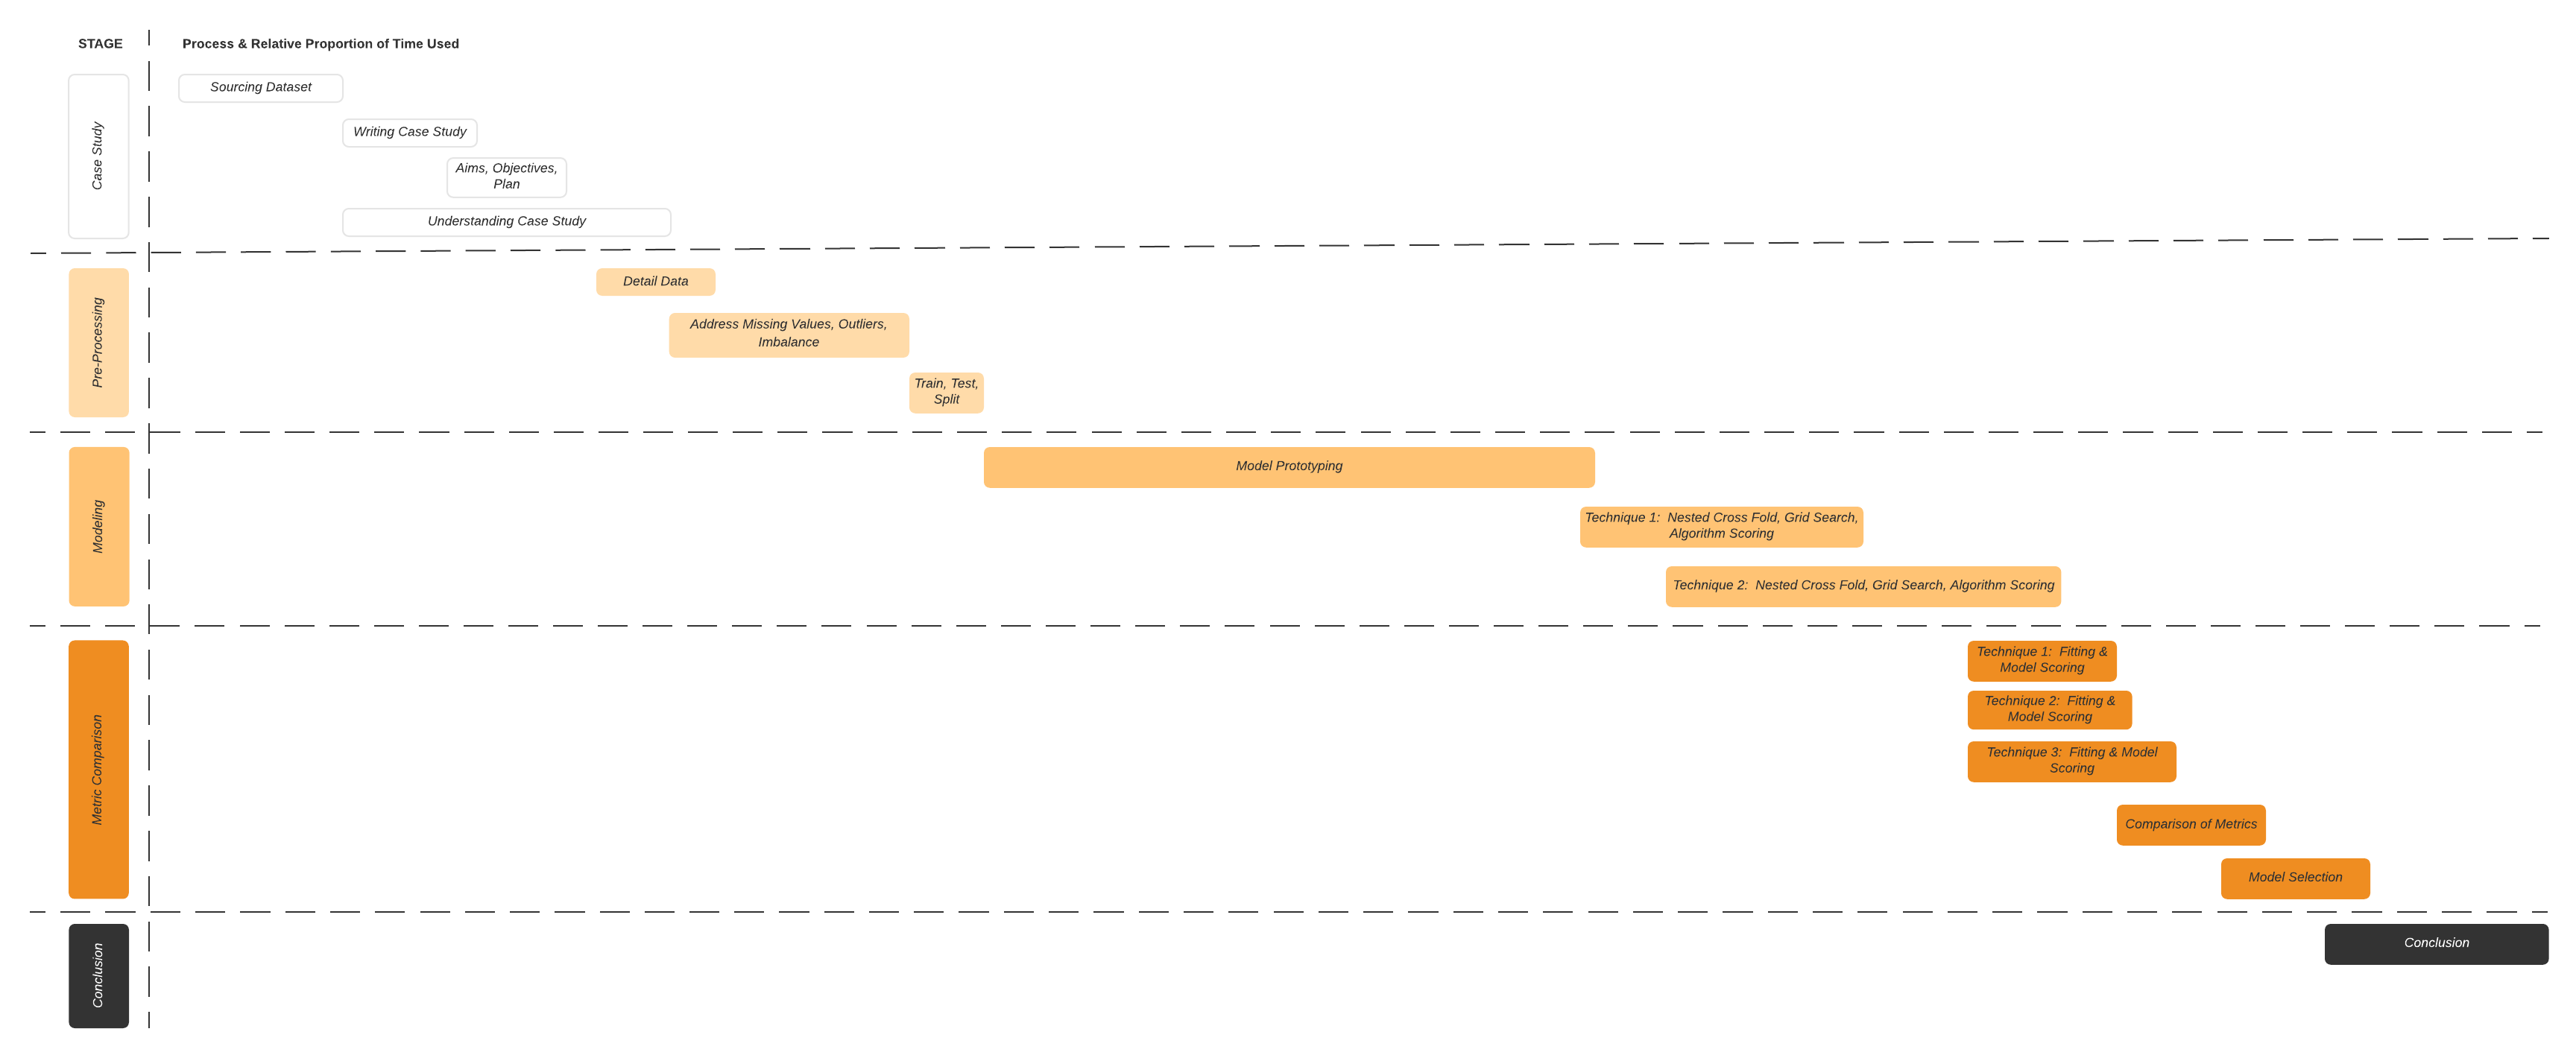

## <b>2. Understanding the Case Study</b>

###  2.1 Case Study Analysis 
Before proceeding with our investigation, we restate the key points found in the case and how we intend to deal with them to address the project's needs appropriately.

1. **Generated Data** - The project provided a generated dataset. Without more profound domain knowledge, we are unable to ascertain how accurately the generated dataset represents practical, real-world observations. Furthermore, admitted technical difficulties in the generation of the dataset have caused an inaccurate representation in the balance between gamma and hadron particles in terms of count. We will, however, move forward on the assurance that the imbalance is addressable and that the generated data is appropriately representative of actual observations.
<br />
<br />
2. **Underrepresentation of Hadron Particles** - Assuming the underrepresentation of hadron particles compared to real data is not indicative of a larger underlying problem, we can manually rebalance the dataset to a more typical porportion, if necessary. However, we will likely balance the two classes equally to avoid bias in the models. 
<br />
<br />
3. **Identify Gamma Rays** - As noted by the customer, gamma is typically the minority class in real datasets. Currently, gamma is the majority class. Regardless, we will likely balance the dataset to equal observations of gamma and hadron to avoid bias not only in our models, but also in our visualizations and other calculations. We will attempt to ascertain the shape our data takes with consideration for each class and prototype models best suited to fit our data.
<br />
<br /> 
4. **Minimize False Positives** - False Positives are of the greatest concern to our customer. Each false positive represents a hadron particle that has been incorrectly identified as a gamma particle. We will attempt to optimize our models for high precision, minimizing the number of false positives.
<br />
<br />
5. **Minimize False Negatives** - Conversely, but secondarily, we will also try to Minimize False Negatives. False negatives represent a gamma particle that is incorrectly classified as a hadron particle. As the subject of our customer's studies, capturing as many gamma particles as possible will be beneficial to their research. We consider false negatives by watching our model's recall. This can also be thought of as maximizing our true positive rate. The fewer positive class observations we misclassify, the more true positive class data the ATGPP has for their research.

## <b>3. Dataset Description</b>

### 3.1 About the Data
As mentioned above, this dataset was generated from generated by the Monte Carlo program Corsika, described in: D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, [Forschungszentrum Karlsruhe FZKA 6019 (1998)](https://www.iap.kit.edu/corsika/70.php). It was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope).

The data set is stored as a comma-separated .data file accompanied by a sidecar .name file containing pertinent information regarding the data, such as feature information conveyed below.

#### **Dataset: magic04.data** (11 columns)
<DL>
<DT><p>Our dataset contains 11 columns, including the classification column, and 19,020 observations.</p>
<DD><h5><b>Columns</b></h5>
<DD><b>fLength:</b> continuous [mm] - major axis of ellipse
<DD><b>fWidth:</b> continuous [mm] - minor axis of ellipse
<DD><b>fSize:</b> continuous [in #phot] - 10-log of sum of content of all pixels
<DD><b>fConc:</b> continuous [ratio] - ratio of sum of two highest pixels over fSize 
<DD>
<DD><b>fConc1:</b> continuous [ratio] - ratio of highest pixel over fSize
<DD><b>fAsym:</b> continuous [mm] - distance from highest pixel to center, projected onto major axis 
<DD><b>fM3Long:</b> continuous [mm] - 3rd root of third moment along major axis.
<DD><b>fM3Trans:</b> continuous [mm] - 3rd root of third moment along minor axis.
<DD><b>fAlpha:</b> continuous [deg] - angle of major axis with vector to origin.
<DD><b>fDist:</b> continuous [mm] - distance from origin to center of ellipse.
<DD><b>class:</b> categorical [g,h] - gamma (signal), hadron (background)
<DD> <br />
</DL>
* column descriptions provided by source

### 3.2 Imports & Helper Functions

In [ ]:
import os
import pandas as pd
import numpy as np
import joblib

# Prep
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics & Reporting
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Algorithms
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model
from keras.constraints import maxnorm
from keras.layers import Dropout

# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [ ]:
# Helper Function to Visualize & View Balance of Data
def get_balance(df, label_col, pos_label, neg_label):
  # quantify the balance of classifcations
  pos_trans = df[df[label_col] == 1].shape[0]
  neg_trans = df[df[label_col] == 0].shape[0]

  pos_percent = round((pos_trans / len(df)) * 100, 2)
  neg_percent = round((neg_trans / len(df)) * 100, 2)

  plt.bar([f'{neg_label} (0)',f'{pos_label} (1)'], 
          [neg_trans, pos_trans],
          color=['tab:blue', 'tab:orange'])
  plt.show()

  print(f'{neg_label} (0): {neg_trans} Observations, {neg_percent} percent of dataset')
  print(f'{pos_label} (1): {pos_trans} Observations,  {pos_percent} percent of dataset')

# Helper Function to Plot Learning Curves
# code courtesy of and adapted from sklearn documentation
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    if axes is None:
        _, axes = plt.subplots(figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt
    
# Save scores and parameters of NN model tests
def save_GSCV_NN_results(cv_results_var, store_path, print_iter_head=False, print_file_head=False):
  # store current scores
  grid_iter_scores = pd.DataFrame(cv_results_var.cv_results_)

  grid_iter_scores['param_model__hidden_layers'] = grid_iter_scores['param_model__hidden_layers'].astype(int)

  # if multiple layer strats defined, reconcile layer counts with node counts
  grid_iter_scores['param_model__hidden_units'] = grid_iter_scores.apply(lambda x: x['param_model__hidden_units'][:x['param_model__hidden_layers']], 1)

  if os.path.exists(store_path):
    # load prevous modee scores
    grid_scores = pd.read_pickle(store_path)

    # merge current scores with past scores
    grid_scores_export = pd.concat([grid_iter_scores, grid_scores])
    # save
    grid_scores_export.to_pickle(store_path)

  else:
    grid_iter_scores.to_pickle(store_path)

  if print_iter_head:
    return grid_iter_scores.head()
  
  if print_file_head:
    return pd.read_pickle(store_path).head()
  
  print(f'Results Saved to {store_path}')

# Helper Function to save Pipelined Neural Net
def save_NN(model_var, model_save_path, pipeline_save_path):

  model_var.named_steps['model'].model.save(model_save_path)

  # This hack allows us to save the sklearn pipeline:
  model_var.named_steps['model'].model = None

  # Finally, save the pipeline:
  joblib.dump(model_var, pipeline_save_path)

  del model_var
  
# Helper Function to Report Cross Validation Scores from GridSearchCV
def GSCV_score_report(model_name, cv_var):
  print(f'{model_name} Nested CV Algorithm Selection Performance:')
  print('F1: %.3f (%.3f)' % (np.mean(cv_var['test_f1']), np.std(cv_var['test_f1'])))
  print('Recall: %.3f (%.3f)' % (np.mean(cv_var['test_recall']), np.std(cv_var['test_recall'])))
  print('Precision: %.3f (%.3f)' % (np.mean(cv_var['test_precision']), np.std(cv_var['test_precision'])))

### 3.3 Load, Detail, & Preprocess
First, we will load the data and take a cursory look at the values. We've hosted the dataset online so that it does not need to be accessed locally.

Loading our data into a Pandas Dataframe and checking `df['class'].value_counts()` below, we can confirm the dataset is weighed heavily in favor of gamma particles. Our dataset has a total of 19020 observations in 10 features, plus class, with no missing values. The dimensionality of our dataset is relatively low, but we appear to have a fair number of observations with which to work. 

With that in mind, we will downsample our overrepresented class to prevent bias in our model. If future model tests indicate that we need more observations to achieve better results, we may return and oversample our hadron class. We will, however, consider models that are well-suited to low-dimension, high-observation datasets. 

In [ ]:
# read csv to dataframe named df
df = pd.read_csv("https://drive.google.com/uc?id=1RbJuItGm88zm-uoJhX1jfkgUB04fZ-_R",
                 quoting=3,
                 names=["fLength", 
                        "fWidth",
                        "fSize", 
                        "fConc", 
                        "fConc1", 
                        "fAsym", 
                        "fM3Long", 
                        "fM3Trans", 
                        "fAlpha", 
                        "fDist", 
                        "class"], 
                 sep=',')

In [ ]:
# check dataset
df.head()

fLength    fWidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  class
0   28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828      g
1   31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610      g
2  162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880      g
3   23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370      g
4   75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620      g

[5 rows x 11 columns]

In [ ]:
# view class balance
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [ ]:
# check data types, missing values, size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


Below, we call `df.describe()` to check the various scales that our features represent. We learn that features such as **fAsym** contain a wide range of values, including negative values, while other features, such as **fConc** appear to lie on a 0-1 scale. The drastic difference in our features' respective observation values indicates that we will likely need to scale the data with consideration for the models that we chose—many ML models are sensitive to the scale of our data and the difference in scale between features. 

In [ ]:
df.describe()

fLength        fWidth  ...        fAlpha         fDist
count  19020.000000  19020.000000  ...  19020.000000  19020.000000
mean      53.250154     22.180966  ...     27.645707    193.818026
std       42.364855     18.346056  ...     26.103621     74.731787
min        4.283500      0.000000  ...      0.000000      1.282600
25%       24.336000     11.863800  ...      5.547925    142.492250
50%       37.147700     17.139900  ...     17.679500    191.851450
75%       70.122175     24.739475  ...     45.883550    240.563825
max      334.177000    256.382000  ...     90.000000    495.561000

[8 rows x 10 columns]

We must also remap our class values to binary integers. We will not be using any models that accept categorical data—at least not unencoded categorical data.

In [ ]:
# remap labels and set to "is_gamma" column
df['is_gamma'] = df['class'].map({'h': 0, 'g': 1})

# drop unnecessary "class" column
df.drop(['class'], axis=1, inplace=True)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  is_gamma
0   28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828         1
1   31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610         1
2  162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880         1
3   23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370         1
4   75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620         1

[5 rows x 11 columns]

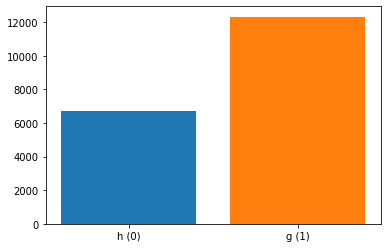

h (0): 6688 Observations, 35.16 percent of dataset
g (1): 12332 Observations,  64.84 percent of dataset


In [ ]:
# double-check and visualize the balance of our data via helper function
get_balance(df, 'is_gamma', 'g', 'h')

In [ ]:
# save n_hadron to pass into our subset process below
n_hadron = df.loc[df['is_gamma'] == 0]['is_gamma'].count()

n_hadron

6688

In [ ]:
# set random_state for consistency in subsequent experiments
df_sample = df.sample(frac=1, random_state=4)

# sample an equal number of gamma and hadron observations
hadron_df = df_sample.loc[df_sample['is_gamma'] == 0]
gamma_df = df_sample.loc[df_sample['is_gamma'] == 1][:n_hadron]

# recombined sampled data
distributed_df = pd.concat([gamma_df, hadron_df])

# sample dataframe rows
balanced_df = distributed_df.sample(frac=1, random_state=89)

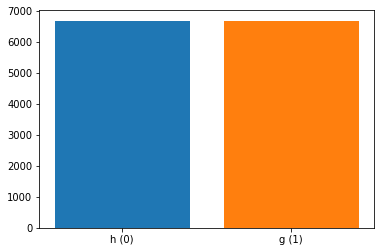

h (0): 6688 Observations, 50.0 percent of dataset
g (1): 6688 Observations,  50.0 percent of dataset


In [ ]:
# confirm balanced dataset
get_balance(balanced_df, 'is_gamma', 'g', 'h')

### 3.4 Plot Data
To better understand the shape our data takes, at least in two dimensions, we plot two different, but similar, sets of pairplots. First, we take a look at the data as a whole, plotting each feature against each other with an overlaid density plot on one side. Along the diagonal, we find that most of our features are normally distributed. Many exhibit a positive skew and **fM3Trans** appears bimodal. We are plotting a large number of data points, but the density overlay helps us understand where the majority of points lie on our plot, to an extent.

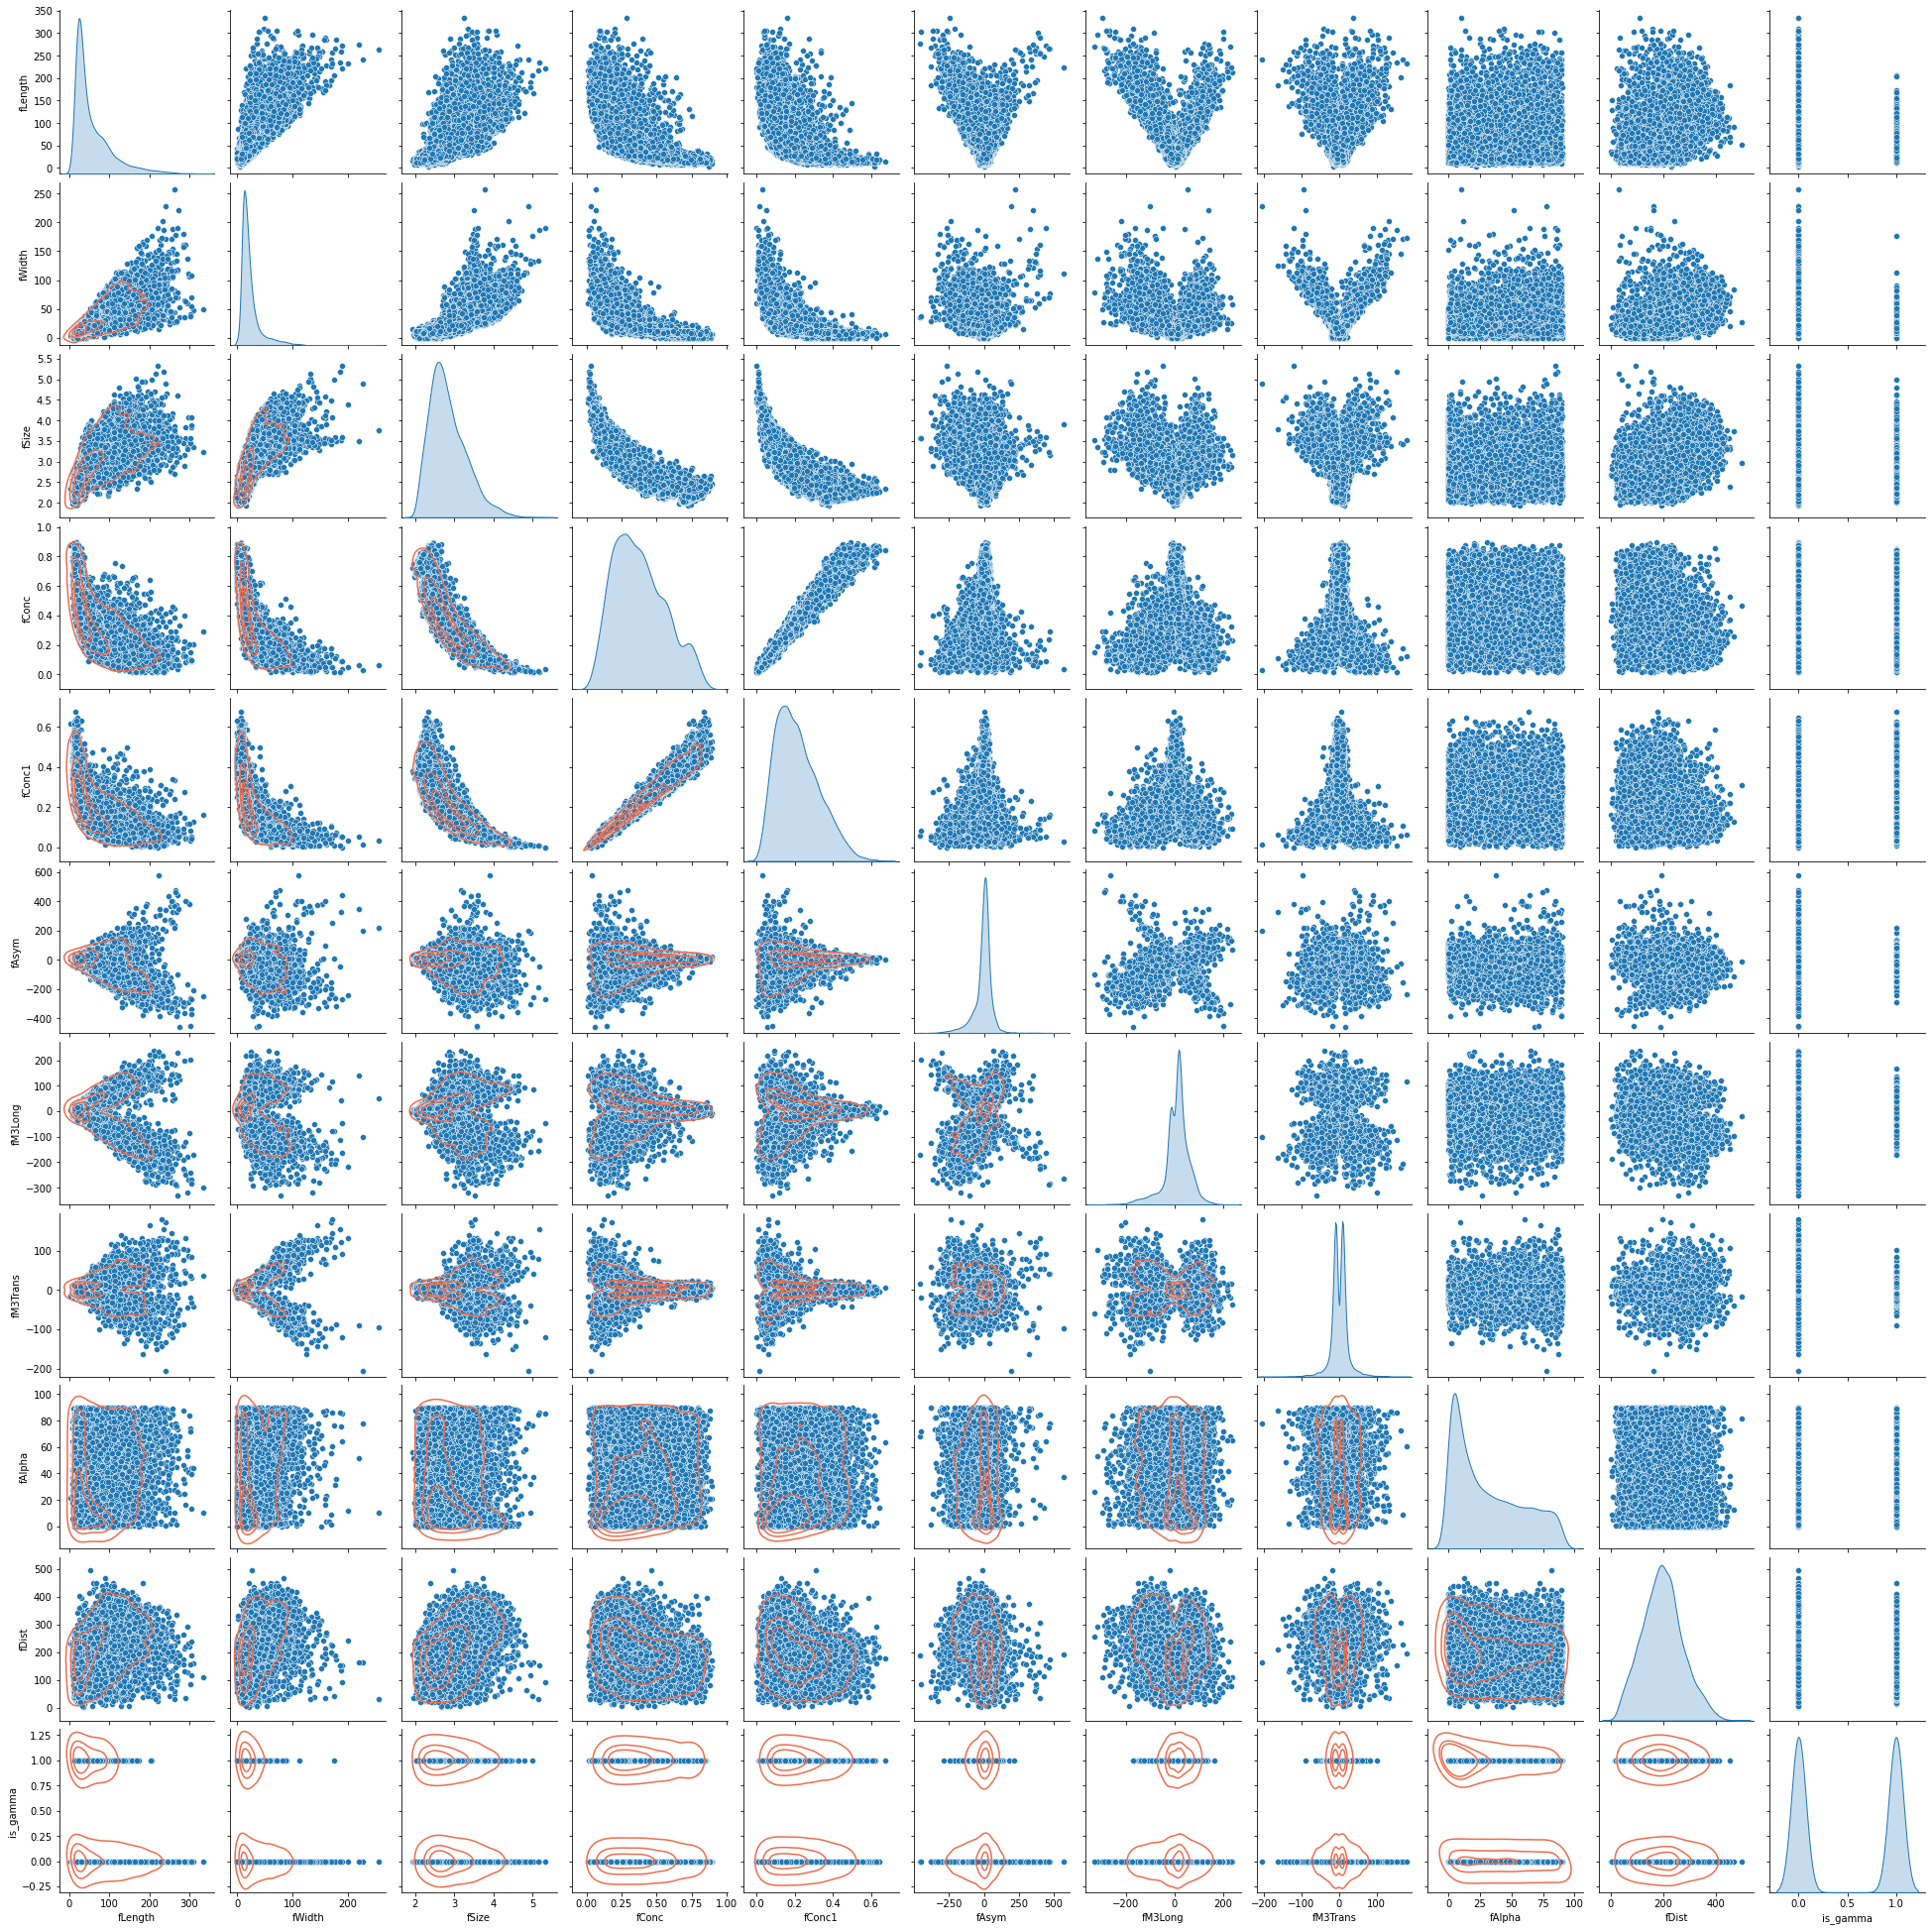

In [ ]:
# plot pairplots with distribution on diag
g = sns.pairplot(balanced_df, diag_kind="kde")

# density plot overlay on lower half
g.map_lower(sns.kdeplot, levels=4, color='#ee6c4d')

Plotting the same pairplots, but separated by class, helps us understand several key points:
- Gamma particles appear to fall together in distinguishable shapes.
- Our data is noisy. Although our particles tend to fall together, with their respective class in distinguishable shapes, the class boundaries appear soft. 
- In many cases, the positive and negative class distributions are fairly similar, indicating that there is no single distinguishing feature. Separating the classes will be a collective effort involving all of the available features.

With these discoveries in mind, we will consider models that are robust to noisy data and that are capable of drawing complex decision boundaries.

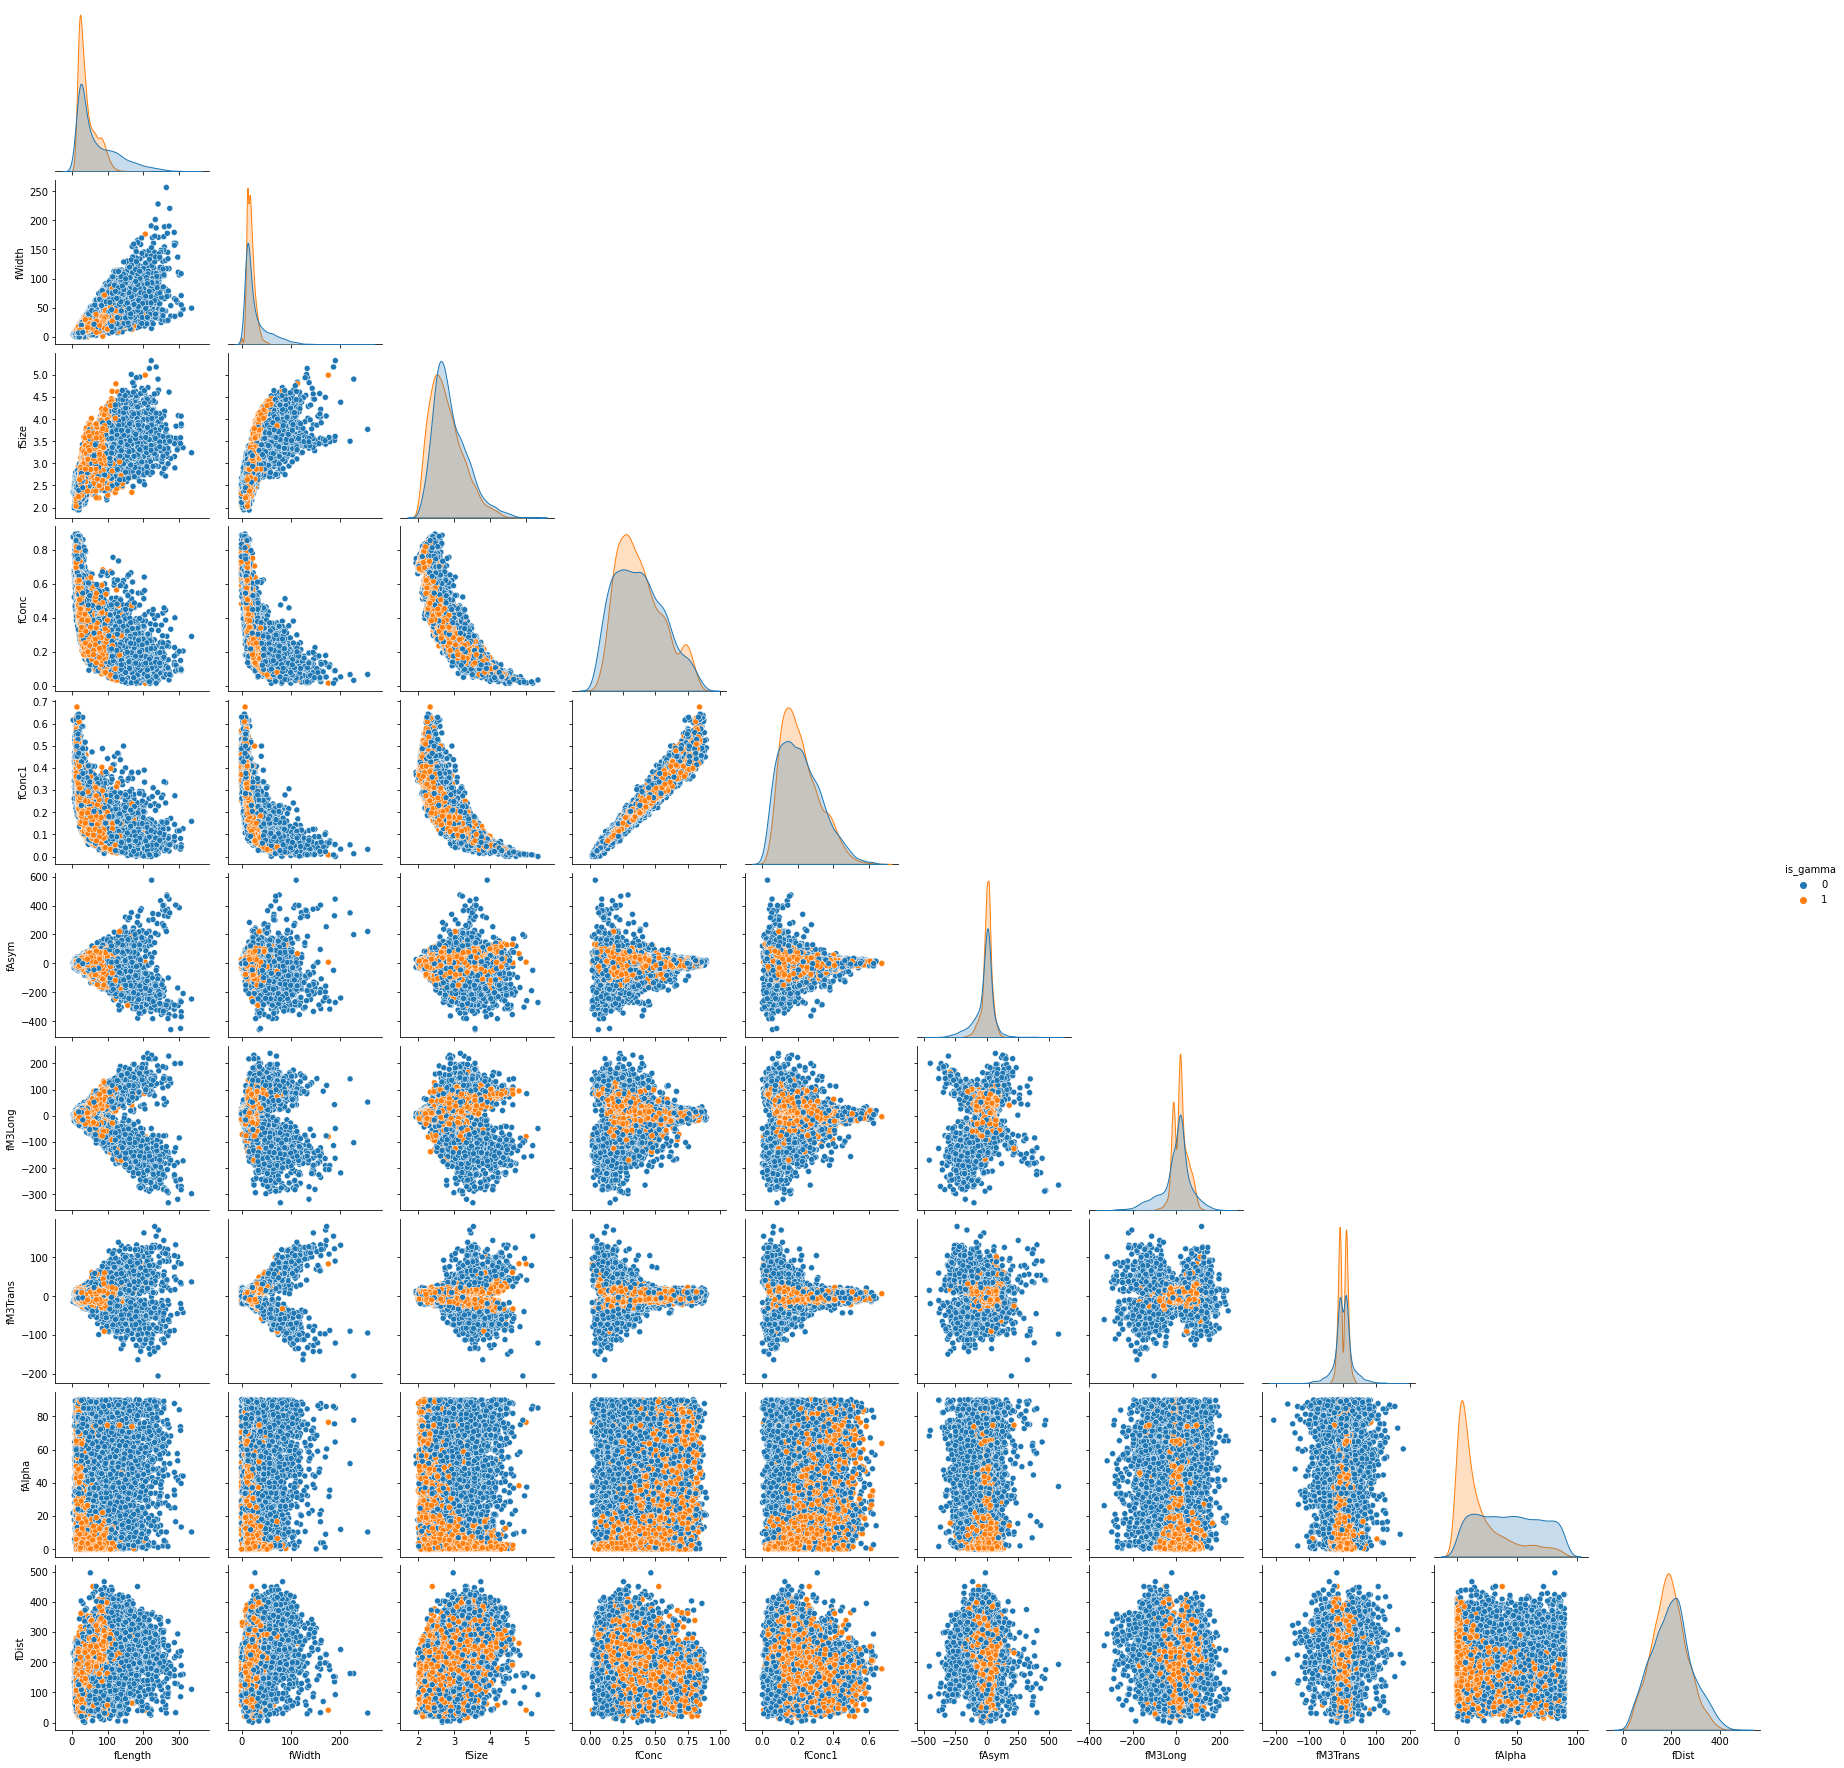

In [ ]:
# plot pairplots with distribution on diag
sns.pairplot(balanced_df, hue="is_gamma", corner=True)

###  3.5 Train-Test Split
Because our dataset contains only 10 features, we will forgo exploration into feature reduction techniques. This now leads us to prepare our training and testing data.

Below, we split our dataset into training and testing subsets for modeling. We reserve 20% of our dataset, dividing them into the `X_test` and `y_test` variables for last-step model evaluation. We will not use these sets during tuning or cross-validation, again, reserving them exclusively for final evaluation.

Our `X_train` and `y_train` subsets will be split into additional training and validation sets during the cross-fold validation process.

In [ ]:
model_df = balanced_df

In [ ]:
# assign features df
X = model_df.drop('is_gamma', axis=1)

# assign labels df
y = model_df['is_gamma']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## <b>4. Technique 1: Support Vector Machine<b>

### 4.1 Motivation
The first model we will explore is the Support Vector Machine. There are several reasons we will begin with this algorithm:

- Support Vector Machines can be used for binary classification.
- They also support both linear and nonlinear problems.
- The complexity of SVMs' decision boundary can be easily adjusted to influence tolerance for misclassifications.
- Datasets with low dimensionality can be mapped to higher dimensions via kernels, increasing the likelihood we find a linear separator between classes.
- SVMs also allow us to easily assess overfitting by examining the support vectors.

### 4.2 Explore: Linear vs Kerenalized SVM
As we are addressing a binary classification problem, we will consider models that support binary classifications. Support Vector Machines are capable models not only for regression but also classification. An SVM will construct a linear $D-1$ dimensional boundary in $D$-dimensional space in an attempt to separate our two classes. 

As we noted above, our data appears noisy in two-dimensional space, with soft boundaries between classes. The two-dimensional plots also show non-linear boundaries between our classes. We, however, have 10 features with which we may be able to find a nine-dimensional linear hyperplane to separate our classes. 

Should we fail to find a sufficient separating hyperplane using our input data, we may also employ a kernelized support vector machine that will map our features into higher-dimensionality in which to search for a separating hyperplane. 

Below, we run a quick comparison between simple Linear and RBF Kernelized SVMs to ascertain whether or not a Linear SVM will be sufficient. Linear SVMs benefit primarily from faster training speed over Kernelized SVMs. This benefit becomes more critical with respect to dataset size and our training of the models with both GridSearch and Cross-Fold Validations. 

#### 4.2.1 Linear SVM Schematic
Click "Enlarge Image" to read the provided schematic more clearly, outlining some details on our Linear SVM model.

[Enlarge Image](https://drive.google.com/file/d/1UXMRXGnN1-H1cV1il3WGUovKqx2eT3aF/view?usp=sharing)

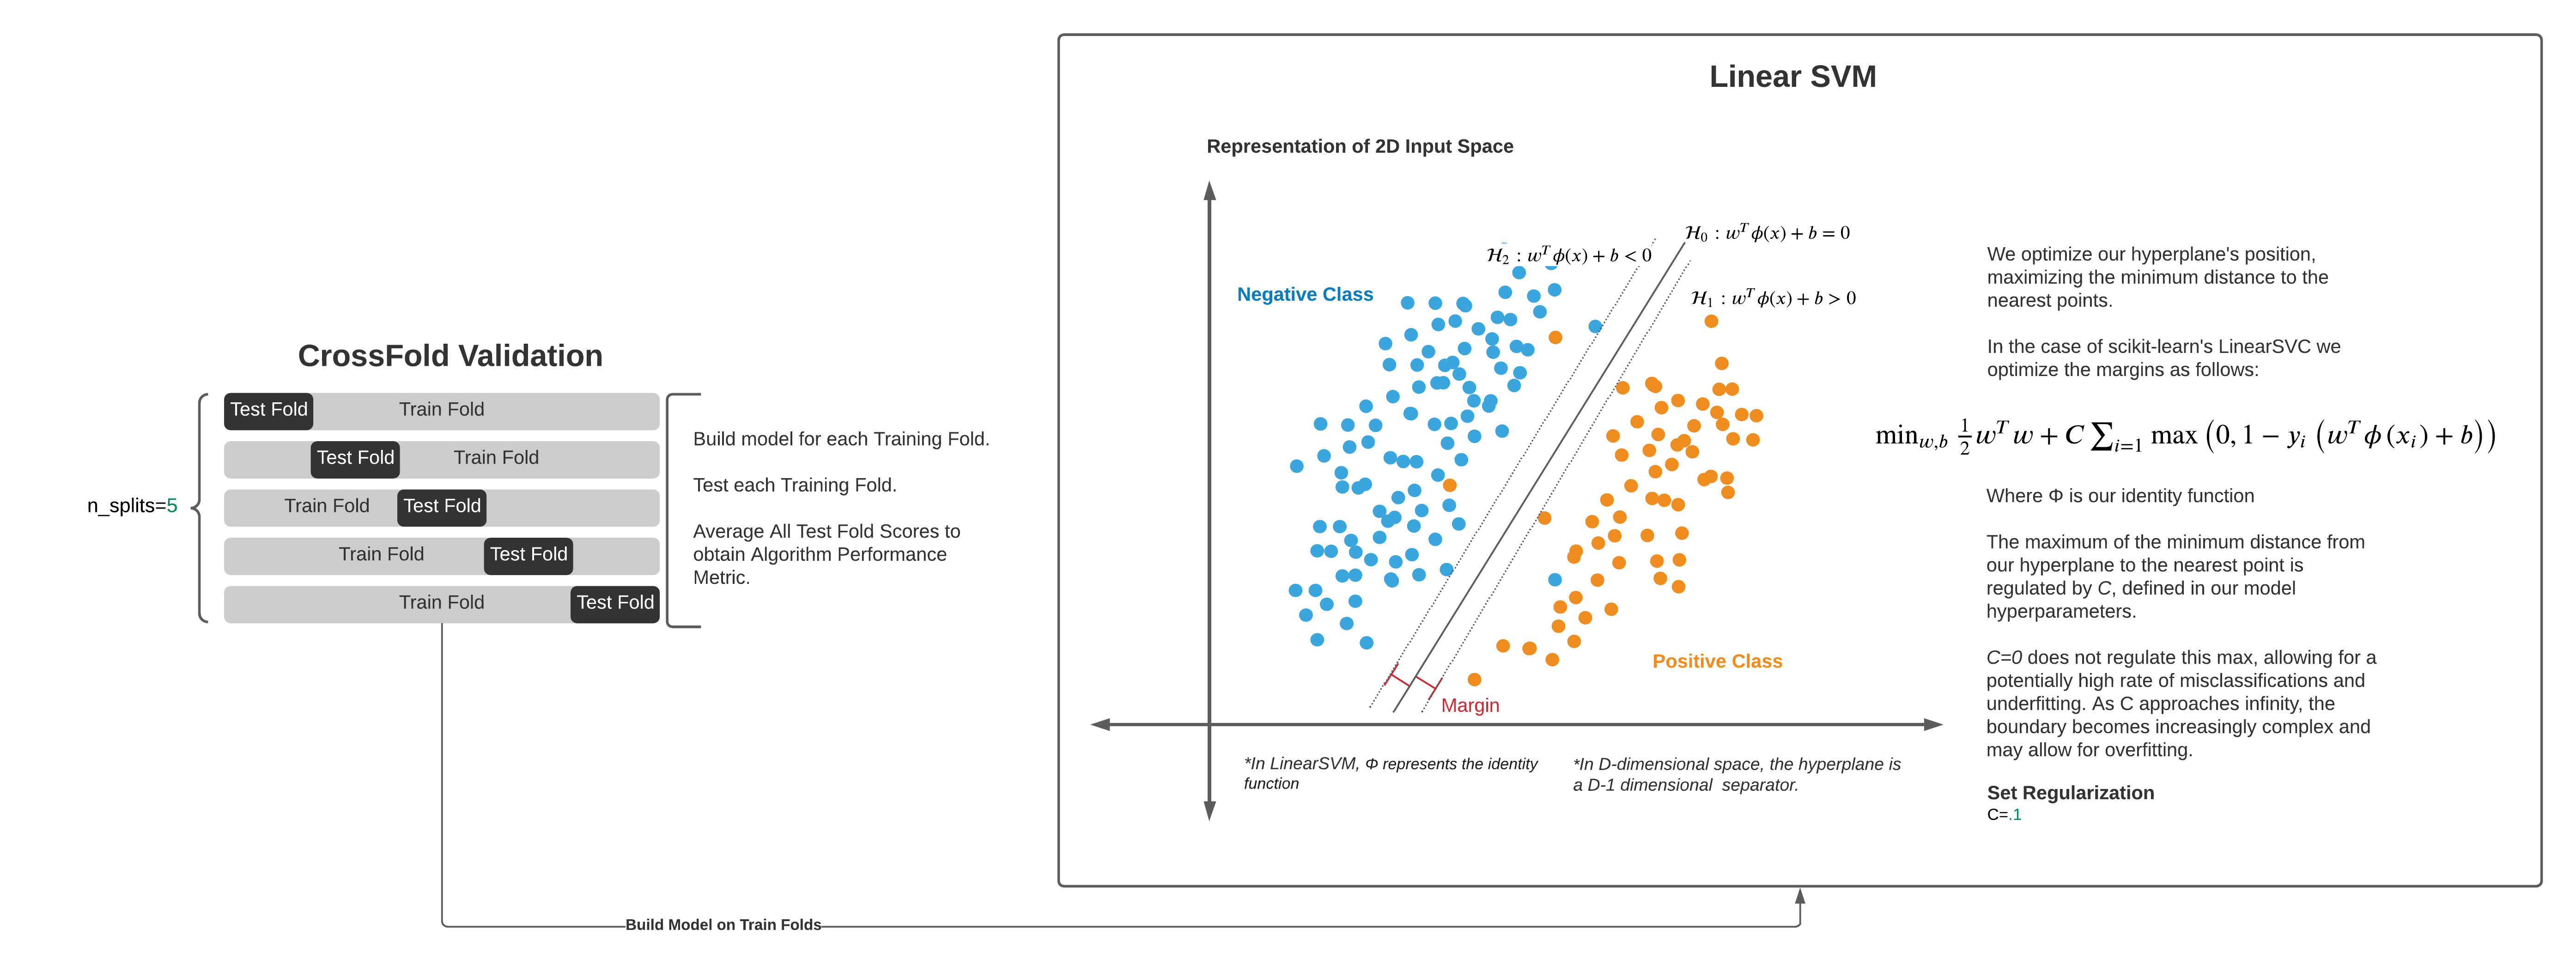

#### 4.2.2 Prototype & Analyze: Linear vs Kerenalized SVM


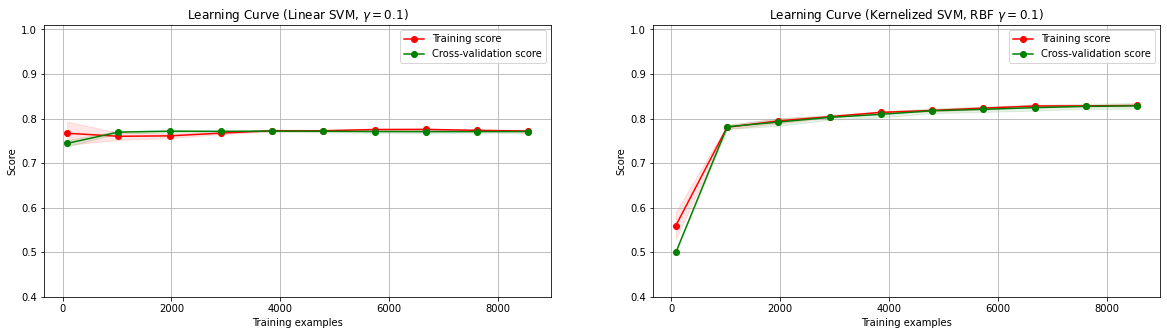

In [ ]:
# set crossfolds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# define subplots, figure
_, axes = plt.subplots(1, 2, figsize=(20, 5))

# Figure 1 - Linear SVM
title_linear = r"Learning Curve (Linear SVM, $\gamma=0.1$)"

# scale, model
pipe_linear = Pipeline([('scaler', preprocessing.StandardScaler()),
                        ('model', LinearSVC(C=.1))])

# plot
plot_learning_curve(pipe_linear, 
                    title_linear, 
                    X_train, 
                    y_train, 
                    axes=axes[0], 
                    ylim=(0.4, 1.01),
                    train_sizes=np.linspace(0.01, 1.0, 10), 
                    cv=cv, 
                    n_jobs=4)

# Figure 2 - Kernelized SVM
title_RBF = r"Learning Curve (Kernelized SVM, RBF $\gamma=0.1$)"

# scale, model
pipe_RBF = Pipeline([('scaler', preprocessing.StandardScaler()),
                     ('model', SVC(C=.1, kernel='rbf'))])

# plot
plot_learning_curve(pipe_RBF, 
                    title_RBF, 
                    X_train, 
                    y_train, 
                    axes=axes[1], 
                    ylim=(0.4, 1.01),
                    train_sizes=np.linspace(0.01, 1.0, 10), 
                    cv=cv, 
                    n_jobs=4)

plt.show()

In the above learning curves, we do not find a dramatic difference between the scores of our implementations of Linear and Kernelized SVMs. However, we can see that the Kernalized SVM does appear to perform slightly better. We also notice that both models converge at a relatively low sample count, indicating that the number of observations we have to work with is more than sufficient. 

We may, with further exploration, find success in testing Kernelized SVMs with other kernel functions, such as polynomial kernels. We also note that Linear SVMs are unlikely to outscore Kernelized SVMs as Kernelized SVMs search not only the same input space but also higher dimension Feature Spaces of our dataset.

### 4.3 Kerenalized SVM
While the Kernelized SVM above only scored slightly better than the Linear SVM, we may find additional success in testing other parameters and kernels. We also acknowledge that while the runtime for the below GridSeachCV with Kernelized SVM is not insignificant, it is also not prohibitive. With that in mind, we will move forward with a Kernelized SVM.

#### 4.3.1 Kernelized SVM Schematic
Click "Enlarge Image" to read the provided schematic more clearly, outlining some details on our Kernelized Support Vector Classification model.

[Enlarge Image](https://drive.google.com/file/d/1eBd4bMOs9UXdwHRvC4T7eYnZAmM7Bnyj/view?usp=sharing)

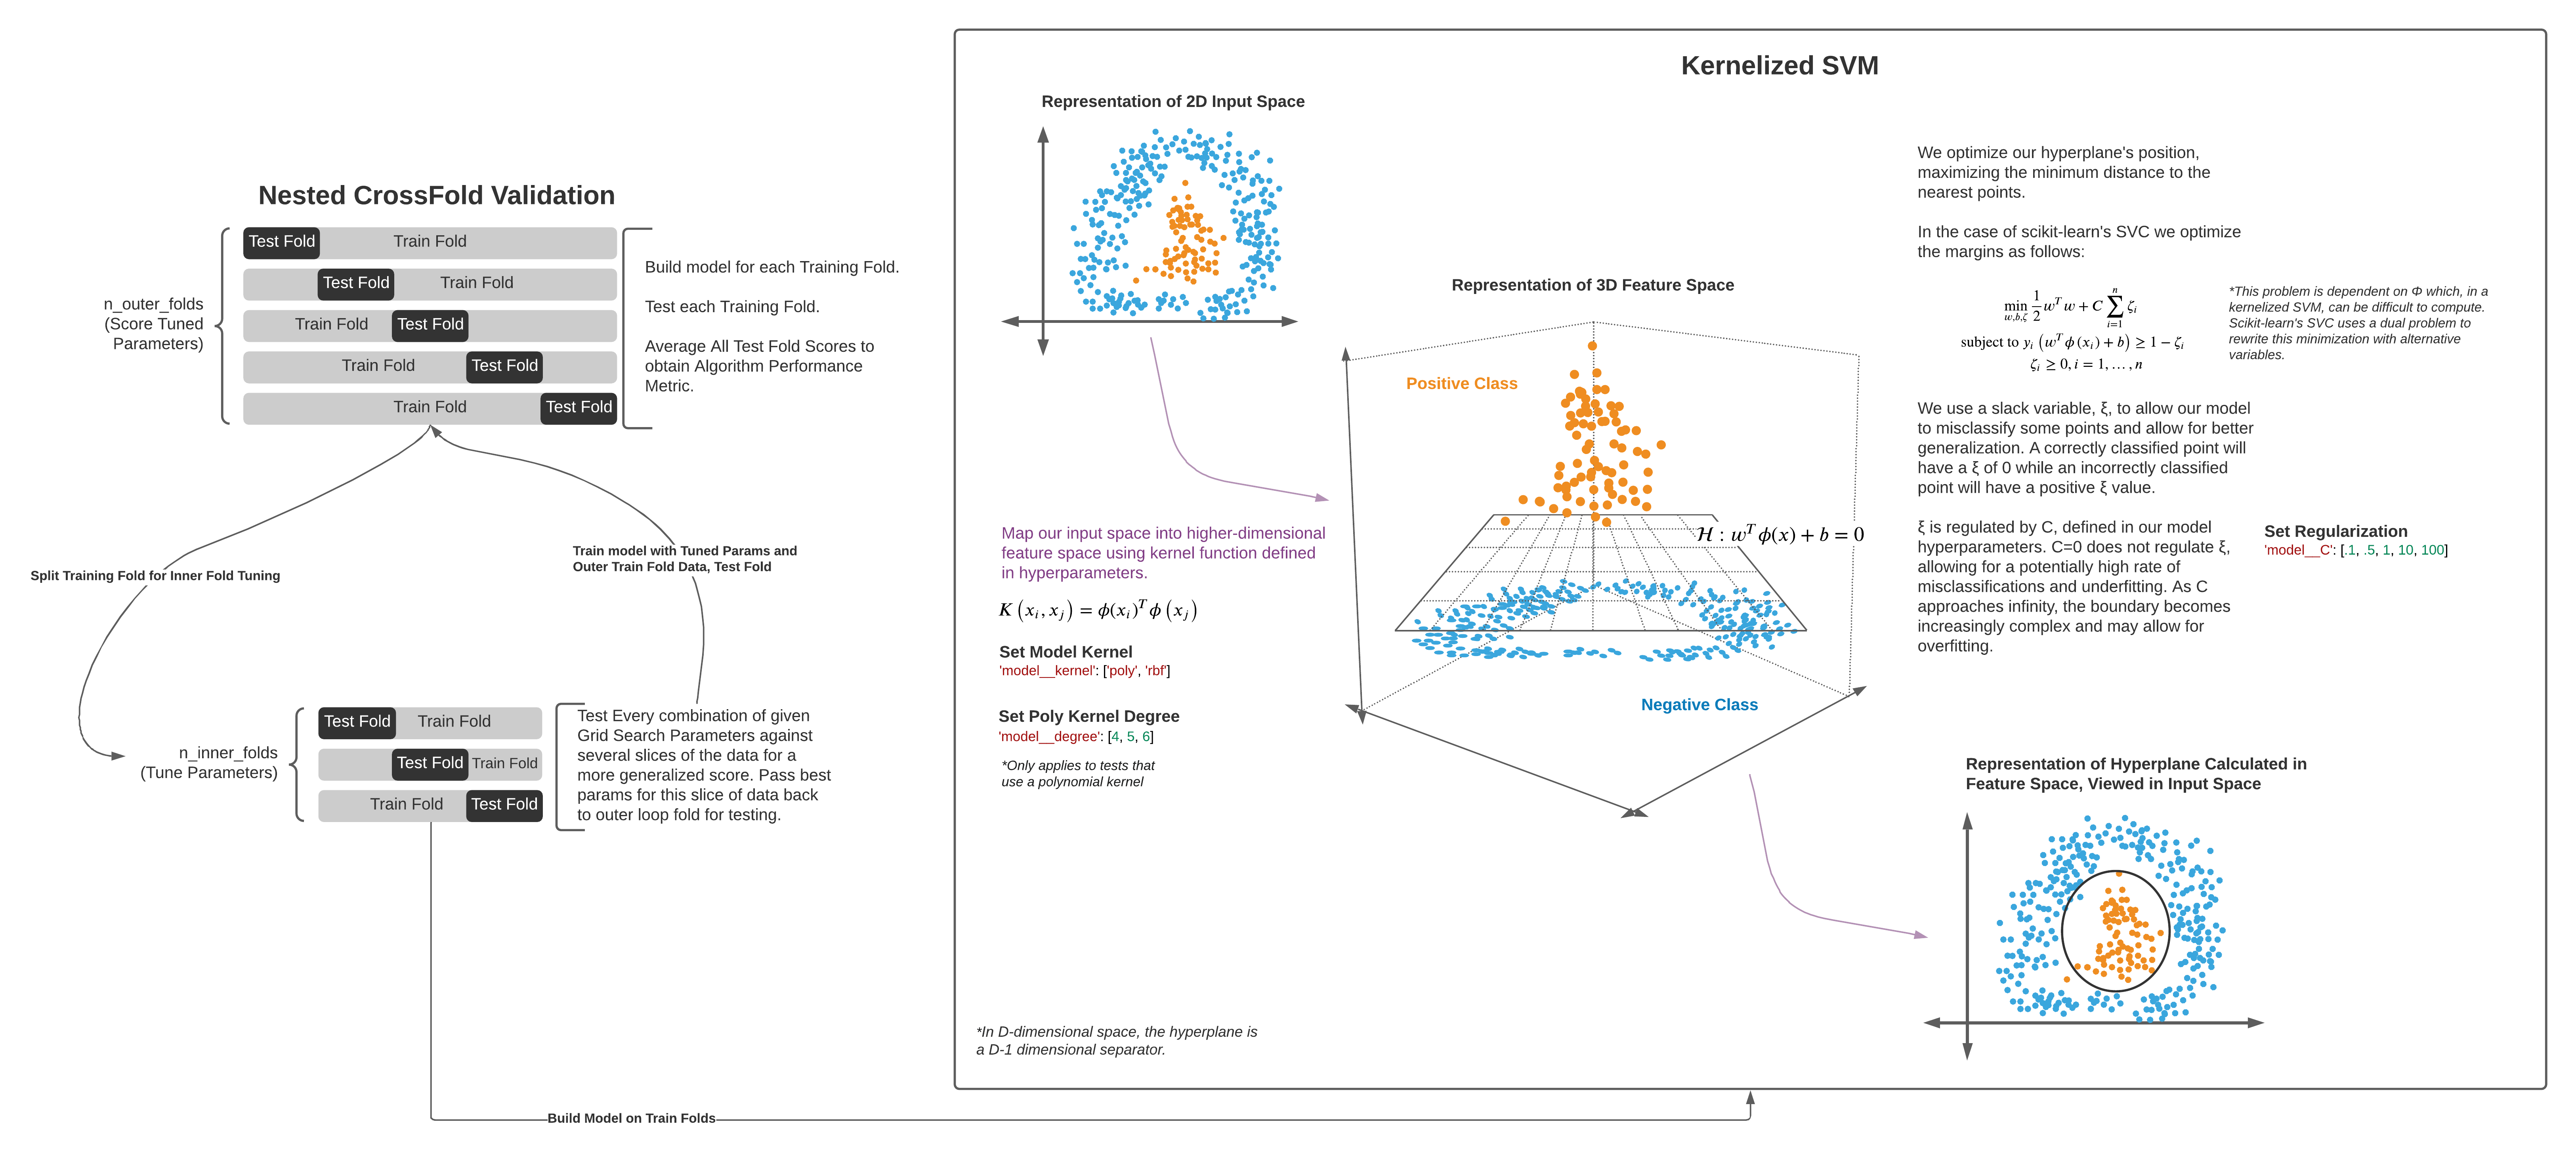

### 4.4 Setting Hyper Parameters 
In building and testing our Kernelized SVM Classifier, we will focus primarily on the following four hyperparameters:

* **C** - C represents our regularization parameter. A low value for C will regularize our slack variable to a lesser degree, making the model more tolerant of misclassifications within the margins of our decision boundary— this allows the model to generalize. A higher value will create a harder decision boundary. A C that is too high can lead to overfitting, while a C that is too low will lead to too many misclassifications. We will test several values.

* **kernel** - We will test the radial basis function (RBF) and the polynomial (poly) kernels. These kernels will map our input space to different feature spaces using RBF and polynomial functions before our model draws a separating hyperplane. 

* **degree** - Degree only applies when our grid searches the polynomial kernel and represents the degree of the polynomial kernel function. We will search only a few options given runtime constraints. 

* **max_iter** - max_iter sets the maximum number of iterations the solver is allowed to run. Because of convergence issues in the prototyping stage, I have set this to -1, for no limit.

*Below, I kept a version of our GridSearch function though it was helpful in testing combinations of hyperparameters in a couple of different iterations.*

### 4.5 Optimising Hyperparameters 
In order to build our model, we define our **outer** and **inner** **cross folds**, build a **pipeline**, and pass everything through **GridSearchCV**:

**Outer Cross Fold** - Our outer cross fold is used to evaluate a selection of best hyperparameters on a different training and testing set than those on which they were built. The average scores of these best hyperparameter tests will then give us an indication of how well an algorithm will generally perform on our dataset. This is used for algorithm selection.
<br />
<br />
**Inner Cross Fold** - Our inner cross folds will select the best hyperparameters for a given fold of training and testing data. This is used both to find hyperparameters with which to train and test our outer crossfolds and, finally, to refit our model with the best hyperparameters trained on the whole, unfolded test set.
<br />
<br />
We will use 3 folds for our Inner CV and 5 folds for our Outer CV. This may seem low, but performance may suffer if the dataset is split too finely.
<br />
<br />
**Pipeline** - Creating a pipeline that contains our scaler and our model will allow us to prevent data leakage when we pass it to our GridSearchCV.
<br />
<br />
**GridSearchCV** GridSearchCV's duty is two-fold. It will search every combination of given hyperparameters and use each combination within a cross-fold validation process. Passing our pipeline to GridSearchCV will ensure that every training set within our cross-fold validation will be scaled separately from each test set, which will prevent information from leaking into our test sets.
<br />
<br />
**Refit:** GridSearchCV's refit allows us to refit our model using the best hyperparameters found according to a particular scoring method of our choosing. We settled on the refit indicated below following a couple of tests, selecting one that results in a model that best represents our customer's needs.

In [ ]:
# configure the inner cross-validation procedure
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
# configure the outer cross-validation procedure
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# instantiate pipeline with scaler and model, so that each training set
# in each fold is fit to the scalar and each training/test set in each fold 
# is respectively transformed by fit scalar, preventing data leaks between each test/train
SVM_pipe = Pipeline([('scaler', preprocessing.StandardScaler()),  
                     ('model', SVC(gamma='auto', cache_size=5000, probability=True))
                   ])

# prams should include where to pass specific prams within the pipeline
# ex, model params need to be prefixed with "model__", scaler with "scaler__"
SVM_params = {'model__C': [.1, .5, 1, 10, 100],
              'model__kernel': ['poly', 'rbf'],
              'model__degree': [4, 5, 6],
              'model__max_iter': [-1],
             }

# define scoring so that we can see multiple metrics
SVM_scoring = {'recall': 'recall', 
               'accuracy': 'accuracy', 
               'f1':'f1', 
               'precision':'precision', 
               'roc_auc':'roc_auc'
              }

# define search grid
SVM_grid = GridSearchCV(estimator=SVM_pipe, 
                       param_grid=SVM_params, 
                       n_jobs=-1, 
                       cv=cv_inner,
                       scoring=SVM_scoring,
                       refit='precision',
                       verbose=3)

In [ ]:
# execute the nested cross-validation
SVM_scores = cross_validate(SVM_grid, 
                           X_train, 
                           y_train, 
                           scoring=SVM_scoring, 
                           cv=cv_outer, 
                           n_jobs=-1, 
                           verbose=3)

# print(SVM_scores.keys())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 29.9min finished


### 4.6 Load Pre-Saved Scores and Models
We can load the model and other details of the above process to variables using the following cell. These files were saved after running the final output of the above GridSearchCV and below grid refit and best model fitting.


In [ ]:
# skip this cell on "run all"
%%script echo skipping

# load algo scores, SVM_scores
SVM_scores = joblib.load('./SVM_saves/SVM_scores.sav')

# load fit best model, SVM_tuned
SVM_tuned = joblib.load('./SVM_saves/SVM_tuned.sav')

### 4.7 Training Performance Metrics 
Below, we output the overall performance of the SVM algorithm on this dataset, as discovered by our Nested Cross Fold Grid Search process. These metrics will be used to compare this algorithm to our other tested algorithms.

In [ ]:
# report SVM performance
GSCV_score_report('Support Vector Machine', SVM_scores)

Support Vector Machine Nested CV Algorithm Selection Performance:
F1: 0.856 (0.004)
Recall: 0.902 (0.009)
Precision: 0.815 (0.005)


#### 4.7.1 Fit the Grid & Best Model
For further analysis to be discussed in section 6, we will refit our model with the best parameters as defined by GridSearchCV above.

In [ ]:
# fit the grid
SVM_grid_result = SVM_grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  9.5min finished


In [ ]:
# view best parameters from fit grid according to refit metric
print("Best: %f using %s" % (SVM_grid_result.best_score_, SVM_grid_result.best_params_))

Best: 0.815335 using {'model__C': 10, 'model__degree': 4, 'model__kernel': 'rbf', 'model__max_iter': -1}


In [ ]:
# refit our model using the best parameters above
SVM_tuned = SVM_grid_result.best_estimator_

#### 4.7.2 Generate Final Predictions
Finally, we generate predictions using our model trained on the best parameters defined above. We use the holdout test set generated in section 3.5, `X_test`. This is the last step in preparing our model for final evaluation in section 6.

In [ ]:
# get predictions for use in later metrics
SVM_pred = SVM_tuned.predict(X_test)

### 4.8 Save Models
Below, we save the details of our process above as well as the final model so that we may load them without re-running the model.

We assign the loaded files to variables above for convinence.

In [ ]:
# skip this cell on "run all"
%%script echo skipping

# save algo scores, SVM_scores
joblib.dump(SVM_scores,'./SVM_saves/SVM_scores.sav')

# save fit best model, SVM_tuned
joblib.dump(SVM_tuned,'./SVM_saves/SVM_tuned.sav')

## <b>5. Technique 2: Neural Network</b>

### 5.1 Motivation
The second model we will fit to our data is a dense, sequential Neural Network. These types of Neural Networks are flexible and well-suited for mapping a set of inputs to a set of outputs for both regression and classification problems.

- Similar to SVMs, Neural Networks can be used for binary classification.
- They also support both linear and nonlinear problems.
- Neural Networks allow for a large search space for parameters, including layer architecture, offering flexibility in how we approach fitting our data. If one architecture and set of parameters perform poorly, we may restructure the network and try again. Additionally, we have opportunities to balance the size of the network against runtime. Larger networks with more layers and nodes will take longer to run but may not necessarily correlate to a better model than more concise networks. 
- We may address overfitting in Neural Networks in several ways, including the use of dropout layers, callbacks, and more restrained network structures. 

#### 5.1.1 Neural Network Schematic
Click "Enlarge Image" to read the provided schematic more clearly, outlining some details on our Neural Network.

[Enlarge Image](https://drive.google.com/file/d/1uUWKfM-hF5orwujesx13L4a4t2Fi_KHr/view?usp=sharing)

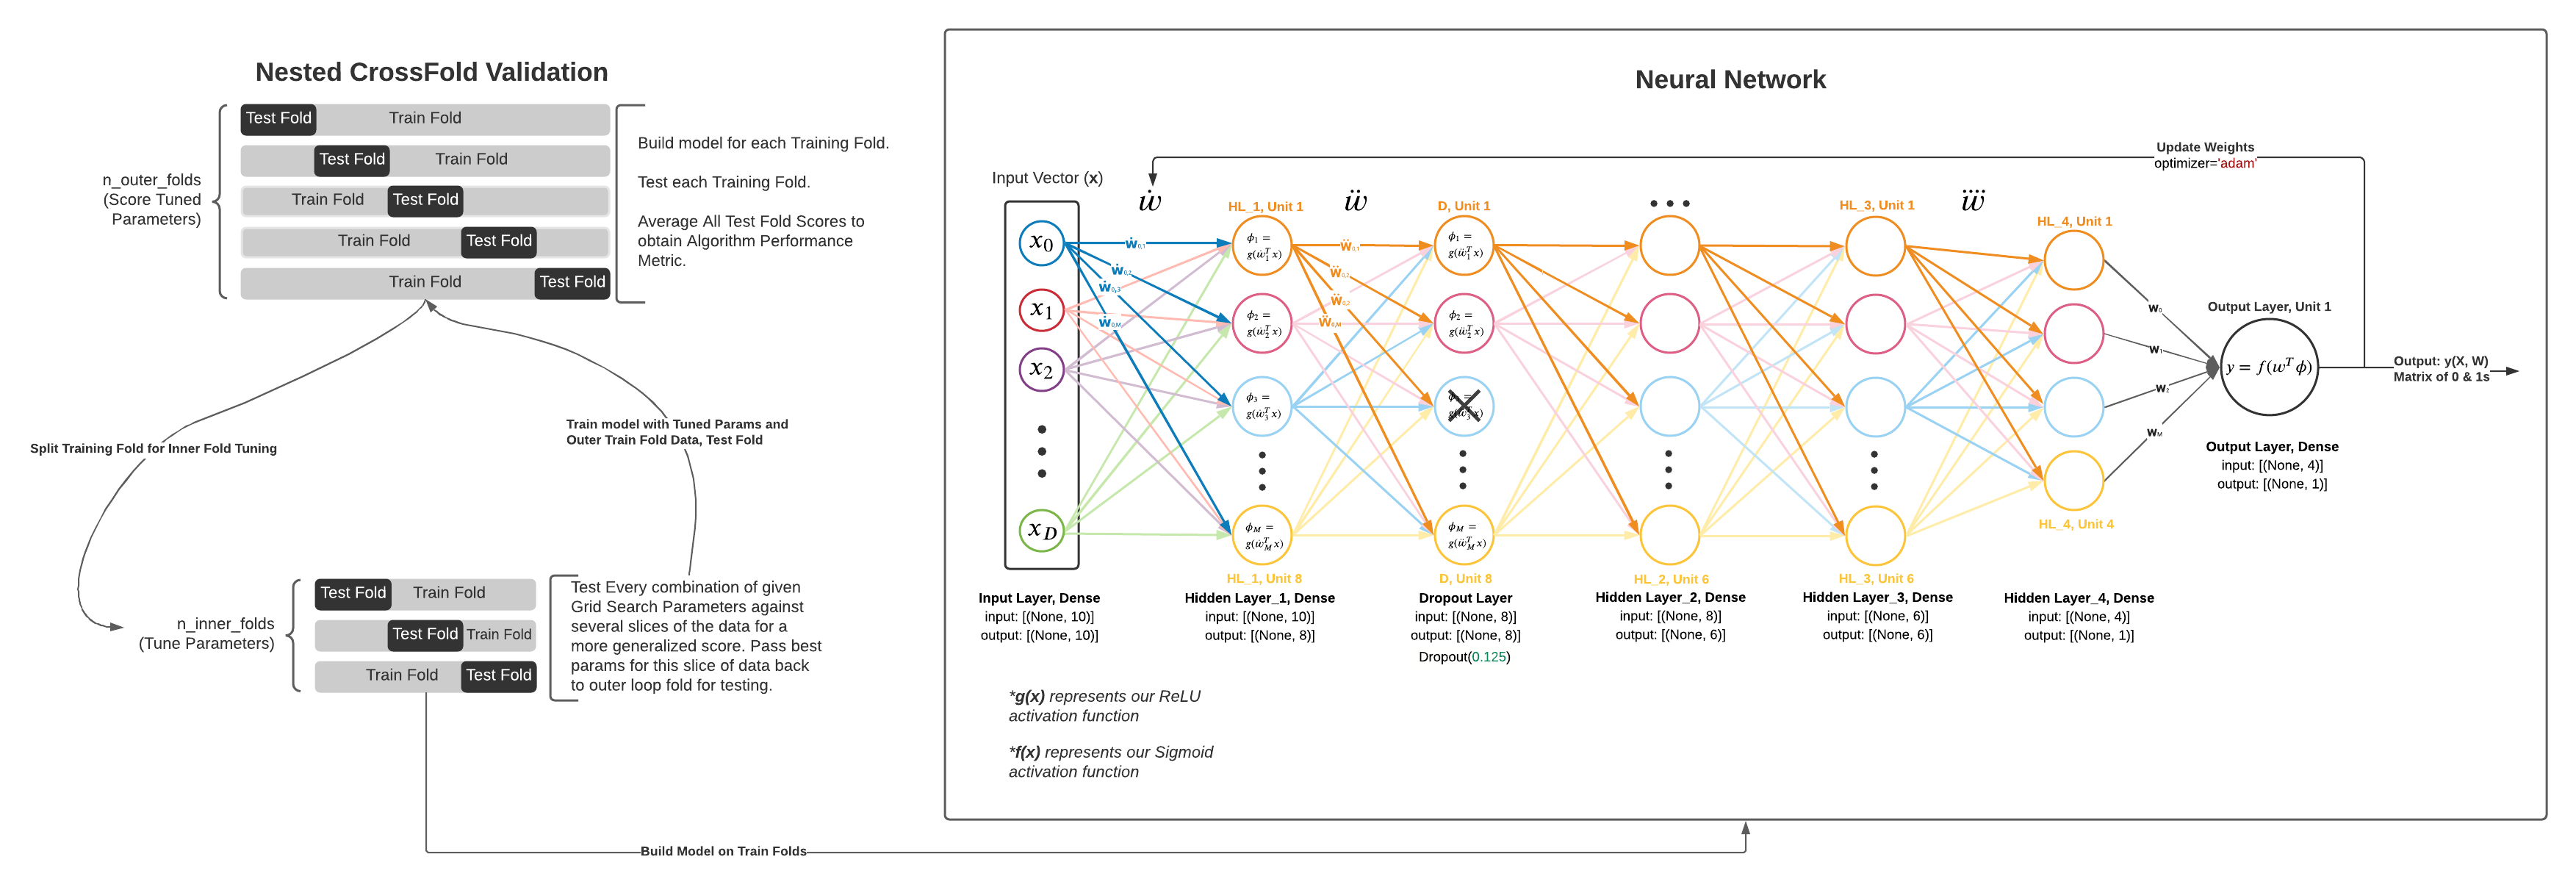

### 5.2 Setting Hyper Parameters 
Owing to the complexity of Neural Networks, we consider a fairly large number of parameters in comparison to an SVM:
* **batch_size** - Batch size refers to the number of samples our model processes before updating the model's weights. We test several different batch sizes.

* **epochs** - A single epoch is one pass through the entirety of our dataset. We test several epoch values.

* **layer_act** - Our layer activation functions are set on a per-layer basis. Each layer can have a different activation function, but it is standard practice to use the same activation function for each layer. That is with the exception of our output layer. We test Relu and Tanh for our hidden layer activation functions.

* **input_width** - `X_train.shape[1]` references the number of X variables in our dataset, mapping each variable to an input node.

* **hidden_layers**, **hidden_width** - Initially, we set the model architecture somewhat arbitrarily. The best way to develop an understanding of the necessary number of hidden layers and nodes in those layers is through testing, which we perform during hyperparameter optimization below. 

* **init_mode** - Parameters passed to init_mode define how each layer's weights are first initialized. This amounts to a "starting point" and can determine whether or not our network converges in a reasonable amount of time. The options we select are related to our choice of the layer activation function. When we use a Tanh activation function, we should also use a Glorot weight initialization method. Relu, however, works best with He initialization.

* **output_width** - We chose `[1]`, a single node, for the output_width, considering we are predicting between two mutually exclusive binary classifications. The inputs to our final output node will be passed through a Sigmoid activation function detailed in output_act below.

* **output_act** - As a binary classification problem with features and label values set between 0 and 1, it also makes sense to use an activation function that outputs predictions as a probability between 0 and 1 and, therefore, chose `sigmoid` to receive an output of 0 or 1. The function also produces a probability-based result between 0 and 1 for each class that we can leverage to increase precision directly.

* **loss** - `'binary_crossentropy'` is given by the formula $-\frac{1}{N} \sum_{n=1}^{N}\left[t_{n} \log \left(y_{n}\right)+\left(1-t_{n}\right) \log \left(1-y_{n}\right)\right]$, measuring the cross entropies of all datapoints and averaging the result by the number of observations. The probabilites of the binary preditcted values, $y$, are directly compared to the actual class values, $t$. `'binary_crossentropy'` is also recommeded by Keras as the loss function to use for binary classification problems with a sigmoid output activiation. 

* **callback** - Callback is a parameter that, in our implementation, uses early stopping to monitor loss and help address overfitting. If the loss remains nearly unchanged for five iterations, training stops.

* **dropout** - We can construct our neural net to include one or more dropout layers to which we pass a value that represents the percentage of nodes we would like to drop from that specific layer's calculations. We add a single dropout layer after our first hidden layer. As there are 8 available nodes, we set a parameter of 0.125 to drop a single node. Dropout layers act as a regularization method intended to help prevent overfitting. In testing, including additional dropout layers caused somewhat frequent cross-validation scores of 0 in some metrics.

* **optimizer** - In this model, we use the default optimizer, Adam, which is a form of stochastic gradient descent.

### 5.3 Optimising Hyperparameters 
We use the same GridSearchCV process as defined above to find the optimal hyperparameters for our Neural Network, with one exception:

**Saving Test Results** - Even small neural networks can take a moderate amount of time to train. While searching the model-defined hyperparameters can take time, we must also experiment with different layer structures and numbers of nodes per layer. Below, we break this process up, running several different Grid Searches with different network structures. We save the score and parameter data to a file between each search, for reference. The Grid Search defined below is the final structure and set of hyperparameters we've decided has the best performance. 
<br /><br />
________
<br />

Below, we restate the details for our hyper-parameter tuning process.

In order to build our model, we define our **outer** and **inner** **cross folds**, build a **pipeline**, and pass everything through **GridSearchCV**:

**Outer Cross Fold** - Our outer cross fold is used to evaluate a selection of best hyperparameters on a different training and testing set than those on which they were built. The average scores of these best hyperparameter tests will then give us an indication of how well an algorithm will generally perform on our dataset. This is used for algorithm selection.
<br />
<br />
**Inner Cross Fold** - Our inner cross folds will select the best hyperparameters for a given fold of training and testing data. This is used both to find hyperparameters with which to train and test our outer crossfolds and, finally, to refit our model with the best hyperparameters trained on the whole, unfolded test set.
<br />
<br />
We will use 3 folds for our Inner CV and 5 folds for our Outer CV. This may seem low, but performance may suffer if the dataset is split too finely.
<br />
<br />
**Pipeline** - Creating a pipeline that contains our scaler and our model will allow us to prevent data leakage when we pass it to our GridSearchCV.
<br />
<br />
**GridSearchCV** GridSearchCV's duty is two-fold. It will search every combination of given hyperparameters and use each combination within a cross-fold validation process. Passing our pipeline to GridSearchCV will ensure that every training set within our cross-fold validation will be scaled separately from each test set, which will prevent information from leaking into our test sets.
<br />
<br />
**Refit:** GridSearchCV's refit allows us to refit our model using the best hyperparameters found according to a particular scoring method of our choosing. We settled on the refit indicated below following a couple of tests, selecting one that results in a model that best represents our customer's needs.

In [ ]:
# Builds the layer archetecture for our Keras Classification model.
def create_model(layer_act, # (str) activation function for input and hidden layers
                 input_units,
                 input_dim, # (int) number of nodes in our input layer
                 hidden_layers, # (int) number of hidden layers. (not incl input and output)
                 hidden_units, # (list of int) number of nodes for each hidden layer, in order
                 init_mode, # (str) kernel_initializer for our model
                 output_act, # (str) activation function for our output layer
                 output_units, # (int) number of nodes in our output layer  
                 loss): # (str) loss function for compile

  # Initialize the constructor
  model = tf.keras.models.Sequential()

  # Add an input layer
  model.add(tf.keras.layers.Dense(input_units,
                                  activation=layer_act,
                                  input_dim=input_dim, 
                                  kernel_initializer=init_mode
                                  ))

  model.add(Dropout(0.125))

  # add designated number of hidden layers
  for i in range(hidden_layers):
    # width is pulled from width by the index of the layer that is being added
    model.add(tf.keras.layers.Dense(hidden_units[i], 
                                    activation=layer_act))
    
  # Add an output layer 
  model.add(tf.keras.layers.Dense(output_units, 
                                  activation=output_act))
 
	# Compile model
  model.compile(loss=loss, 
                optimizer='adam',
                metrics=['accuracy'])
   
  return model

In [ ]:
# configure the inner cross-validation procedure
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# configure the outer cross-validation procedure
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# instantiate pipeline with scaler and model, so that each training set
# in each fold is fit to the scalar and each training/test set in each fold 
# is respectively transformed by fit scalar, preventing data leaks between each test/train
NN_pipe = Pipeline([('scaler', preprocessing.StandardScaler()),
                     ('model', KerasClassifier(build_fn=create_model,
                                               callbacks=[callback]
                                               ))])

# prams should include where to pass specific prams within the pipeline
# ex, model params need to be prefixed with "model__", scaler with "scaler__"
NN_params = {'model__batch_size': [25],
             'model__epochs': [75],
             'model__layer_act': ['relu'],
             'model__input_units': [8], # num nodes in input layer
             'model__input_dim': [X_train.shape[1]],
             'model__hidden_layers': [3], # num of hidden layers to try
             'model__hidden_units': [[6, 6, 4]],
             'model__init_mode': ['he_uniform'],
             'model__output_act': ['sigmoid'],
             'model__output_units': [1], # One for binary classifications (will output 0 or 1). Use with binary_crossentropy loss
             'model__loss': ['binary_crossentropy']}

# define scoring so that we can see multiple metrics
NN_scoring = {'recall': 'recall', 
              'accuracy': 'accuracy', 
              'f1':'f1', 
              'precision':'precision',  
              'roc_auc':'roc_auc'}

# define search
NN_grid = GridSearchCV(estimator=NN_pipe, 
                        param_grid=NN_params, 
                        n_jobs=-1, 
                        cv=cv_inner,
                        scoring=NN_scoring,
                        refit='precision',
                        verbose=2)

In [ ]:
# execute the nested cross-validation
NN_scores = cross_validate(NN_grid, 
                            X_train, 
                            y_train, 
                            scoring=NN_scoring, 
                            cv=cv_outer, 
                            n_jobs=-1, 
                            verbose=2)

# print(RF_scores.keys())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


### 5.4 Training Performance Metrics 
Below, we output the overall performance of the Neural Net model on this dataset, as discovered by our Nested Cross Fold Grid Search process. These metrics will be used to compare this algorithm to our other tested algorithms.

In [ ]:
# report Neural Net Performance
GSCV_score_report('Neural Net', NN_scores)

Neural Net Nested CV Algorithm Selection Performance:
F1: 0.839 (0.005)
Recall: 0.873 (0.022)
Precision: 0.808 (0.022)


#### 5.4.1 Fit Grid & Best Model
For further analysis to be discussed in section 6, we will refit our model with the best parameters as defined by GridSearchCV above.

In [ ]:
# fit the grid
NN_grid_result = NN_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.3s finished


Epoch 1/75
428/428 [==============================] - 1s 1ms/step - loss: 0.6443 - accuracy: 0.6275
Epoch 2/75
428/428 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.7514
Epoch 3/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7690
Epoch 4/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7837
Epoch 5/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7896
Epoch 6/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8027
Epoch 7/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8064
Epoch 8/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8061
Epoch 9/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8054
Epoch 10/75
428/428 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8116

In [ ]:
# view best parameters from fit grid
print("Best: %f using %s" % (NN_grid_result.best_score_, NN_grid_result.best_params_))

Best: 0.810116 using {'model__batch_size': 25, 'model__epochs': 75, 'model__hidden_layers': 3, 'model__hidden_units': [6, 6, 4], 'model__init_mode': 'he_uniform', 'model__input_dim': 10, 'model__input_units': 8, 'model__layer_act': 'relu', 'model__loss': 'binary_crossentropy', 'model__output_act': 'sigmoid', 'model__output_units': 1}


In [ ]:
# refit our model using the best parameters above
NN_tuned = NN_grid_result.best_estimator_

#### 5.4.2 Generate Final Predictions
Finally, we generate predictions using our model trained on the best parameters defined above. We use the holdout test set generated in section 3.5, `X_test`. This is the last step in preparing our model for final evaluation in section 6.

For our neural network, we generate both binary model predictions as well as the class assignment probabilities. We use those probabilities to create two additional sets of predictions, where we adjust the probability threshold for assignment to the positive class from 50% to 60% and 80%.

In [ ]:
# get predictions for use in later metrics
NN_pred = NN_tuned.predict(X_test)

In [ ]:
# get predictions for use in later metrics
NN_pred_proba = NN_tuned.predict_proba(X_test)

# first value is the probability that target=0 
# second value is the probability that target=1
NN_pred_proba

array([[0.9943356 , 0.00566441],
       [0.48848033, 0.5115197 ],
       [0.9717905 , 0.02820951],
       ...,
       [0.17393386, 0.82606614],
       [0.41529083, 0.58470917],
       [0.02255189, 0.9774481 ]], dtype=float32)

In [ ]:
# probability threshold 60%+ = 1
proba_60_pred = np.zeros((len(NN_pred_proba), 1), dtype=int)

# loop and assign postive class
for i, v in enumerate(NN_pred_proba):
  if .6 <= v[1]:
    proba_60_pred[i] = 1
  else:
    pass

np.count_nonzero(proba_60_pred == 1)

1243

In [ ]:
# probability threshold 60%+ = 1
proba_80_pred = np.zeros((len(NN_pred_proba), 1), dtype=int)

# loop and assign postive class
for i, v in enumerate(NN_pred_proba):
  if .8 <= v[1]:
    proba_80_pred[i] = 1
  else:
    pass

np.count_nonzero(proba_80_pred == 1)

763

#### 5.4.1. Saving the GridSearchCV Scores
Running a cross-folded grid search on neural nets, even small ones, is time-consuming. As such, I ran small batches of experiments and saved the parameters and scores for troubleshooting and additional research.

In [ ]:
path = "./NN_testResults/zero_test.pkl"

In [ ]:
# skip this cell on "run all"
%%script echo skipping
save_GSCV_NN_results(NN_grid_result, path, print_iter_head=True)

#### 5.4.1. View Saved GridSearchCV Scores


In [ ]:
# load prevous scores
grid_scores = pd.read_pickle(path)

for col in ['params','param_model__hidden_units']:
  grid_scores[col] = grid_scores[col].astype('str')

grid_scores_grp = grid_scores.groupby(['param_model__batch_size', 
                                       'param_model__epochs', 
                                       'param_model__init_mode', 
                                       'param_model__input_units', 
                                       'param_model__layer_act',
                                       'param_model__hidden_layers', 
                                       'param_model__hidden_units',
                                       'param_model__output_act',
                                       'param_model__output_units',
                                       'param_model__loss']).agg({'mean_test_precision': 'mean', 
                                                                  'mean_test_recall': 'mean'})

grid_scores_grp = grid_scores_grp.sort_values(by=['mean_test_precision'], ascending=False)

In [ ]:
grid_scores_grp.head()

mean_test_precision  mean_test_recall
param_model__batch_size param_model__epochs param_model__init_mode param_model__input_units param_model__layer_act param_model__hidden_layers param_model__hidden_units param_model__output_act param_model__output_units param_model__loss                                         
50                      100                 he_uniform             8                        relu                   3                          [7, 5, 3]                 sigmoid                 1                         binary_crossentropy             0.823265          0.856796
25                      75                  he_uniform             8                        relu                   3                          [7, 5, 3]                 sigmoid                 1                         binary_crossentropy             0.820924          0.857730
50                      75                  he_normal              8                        relu                   3                          [8, 6, 4]                 sigmoid                 1                         binary_crossentropy             0.819248          0.856235
                        100                 he_uniform             8                        relu                   3                          [8, 6, 4]                 sigmoid                 1                         binary_crossentropy             0.817122          0.857357
25                      75                  he_normal              8                        relu                   3                          [6, 4, 2]                 sigmoid                 1                         binary_crossentropy             0.816211          0.872873

## <b>6. Comparison of Metrics Performance for Testing</b> 


### 6.1 Comparison with Appropriate Metrics for Testing 

In [ ]:
# define a dictionary to hold all of our model details
mod_dict = {'Support Vector Machine': [SVM_scores, SVM_pred, SVM_tuned],
            'Neural Network': [NN_scores, NN_pred, NN_tuned]}

#### 6.1.1 Comparison of Algorithms 
In order to build our models, we utilized nested cross fold validation. Models can become overfit if they are trained too specifically on our given training data. Cross Fold Validation helps to reduce the risk of overfitting by training models on multiple different slices of the given training data, making it difficult for a model to overfit on the training set as a whole.

Below, we take a look at the results of our outer crossfold validations. The outer crossfold validation returns a score for how well a given algorithm will generally perform on our given dataset. This is used for comparing the potential performance of multiple candidate algorithms.

We find that both our Kernelized SVM and our Neural Network perform similarly well in our primary target metric, percision. Our SVM, however, out-scored our neural net in terms of recall which, as our secondary target metric, is significant.

In [ ]:
for k, v in mod_dict.items():
  GSCV_score_report(k, v[0])
  print('')

Support Vector Machine Nested CV Algorithm Selection Performance:
F1: 0.856 (0.004)
Recall: 0.902 (0.009)
Precision: 0.815 (0.005)

Neural Network Nested CV Algorithm Selection Performance:
F1: 0.839 (0.005)
Recall: 0.873 (0.022)
Precision: 0.808 (0.022)



#### 6.1.2 Comparison of Models on Final Predictions
Recall that in sections 4.4 and 5.4 we used our `X_test` subset, previously unseen by our models, to generate predictions. By passing those predictions along with the true values, `y_test`, to `classification_report()`, we can ascertain more clearly how our models would perform on new data. 

Below, we discover that the previously mentioned trend holds. When we test our models on our holdout test set, SVM and our Neural Net perform similarly in terms of precision in the positive class, gamma, but SVM scores slightly better in precision for the negative class, hadron. Our SVM also outperformed the Neural net in our secondary metric, recall, for the positive class.

In [ ]:
for k, v in mod_dict.items():
  print(k)
  print(classification_report(y_test, v[1]))
  print('')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1337
           1       0.81      0.90      0.85      1339

    accuracy                           0.84      2676
   macro avg       0.85      0.84      0.84      2676
weighted avg       0.85      0.84      0.84      2676


Neural Network
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1337
           1       0.82      0.86      0.84      1339

    accuracy                           0.84      2676
   macro avg       0.84      0.84      0.84      2676
weighted avg       0.84      0.84      0.84      2676




Our Neural Net does offer one option that we cannot consider reliable in the SVM. Through the Sigmoid output function, we also obtain probabilities that an observation will be of the 0 or 1 class. Refer to section 5.4, where we used `predict_proba` and a simple loop to create two new prediction sets with different probability thresholds for our positive class. 

The result, outlined below, is the ability to reduce false positives at the expense of false negatives. This option may be attractive to our customers depending on how problematic false positive classifications truly are to their research. 

SVM includes a parameter that will estimate probabilities. Unfortunately, they are only estimates and the additional calculation necessary increases the runtime of the algorithm.

In [ ]:
print("Neural Network: proba_60_pred")
print(classification_report(y_test, proba_60_pred))
print('')

print("Neural Network: proba_80_pred")
print(classification_report(y_test, proba_80_pred))
print('')

Neural Network: proba_60_pred
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1337
           1       0.84      0.78      0.81      1339

    accuracy                           0.82      2676
   macro avg       0.82      0.82      0.82      2676
weighted avg       0.82      0.82      0.82      2676


Neural Network: proba_80_pred
              precision    recall  f1-score   support

           0       0.66      0.95      0.78      1337
           1       0.91      0.52      0.66      1339

    accuracy                           0.74      2676
   macro avg       0.79      0.74      0.72      2676
weighted avg       0.79      0.74      0.72      2676




We also generated confusion matrices as a more visual representation of the above classification reports.

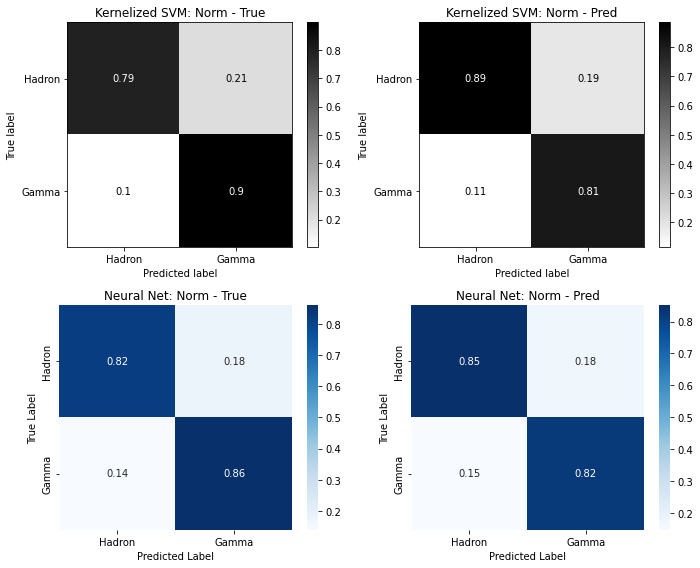

In [ ]:
# add labels to confusion matrix
target_labels = ['Hadron', 'Gamma']

# reformat our NN_pred to work with confusion plot
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=NN_pred).numpy()
con_mat_norm_true = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_norm_pred = con_mat.astype('float') / con_mat.sum(axis=0)

# NN normed predicitons
con_mat_norm_pred_df = pd.DataFrame(con_mat_norm_pred,
                                    index = target_labels, 
                                    columns = target_labels)

# NN normed true
con_mat_norm_true_df = pd.DataFrame(con_mat_norm_true,
                                    index = target_labels, 
                                    columns = target_labels)

# define plot figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# plot SVM True Normed Confusion Matrix
plot_confusion_matrix(SVM_tuned, 
                      X_test, 
                      y_test,
                      ax=ax1[0],
                      display_labels=target_labels, 
                      cmap=plt.cm.binary,
                      normalize='true',
                      values_format = '.2g')
ax1[0].title.set_text("Kernelized SVM: Norm - True")

# plot SVM Pred Normed Confusion Matrix
plot_confusion_matrix(SVM_tuned, 
                      X_test, 
                      y_test, 
                      ax=ax1[1],
                      display_labels=target_labels, 
                      cmap=plt.cm.binary,
                      normalize='pred',
                      values_format = '.2g')
ax1[1].title.set_text("Kernelized SVM: Norm - Pred")

# plot NN True Normed Confusion Matrix
sns.heatmap(con_mat_norm_true_df, 
            annot=True, 
            cmap=plt.cm.Blues, 
            ax=ax2[0])
ax2[0].title.set_text("Neural Net: Norm - True")
ax2[0].set_ylabel('True Label')
ax2[0].set_xlabel('Predicted Label')

# plot NN Pred Normed Confusion Matrix
sns.heatmap(con_mat_norm_pred_df, 
            annot=True, 
            cmap=plt.cm.Blues, 
            ax=ax2[1])
ax2[1].title.set_text("Neural Net: Norm - Pred")
ax2[1].set_ylabel('True Label')
ax2[1].set_xlabel('Predicted Label')

plt.tight_layout()  
plt.show()

Typically, ROC/AUC Curves are a good comparative measure for model evaluation. In this case, however, they are nearly identical, leaving us to select a candidate based on other metrics.

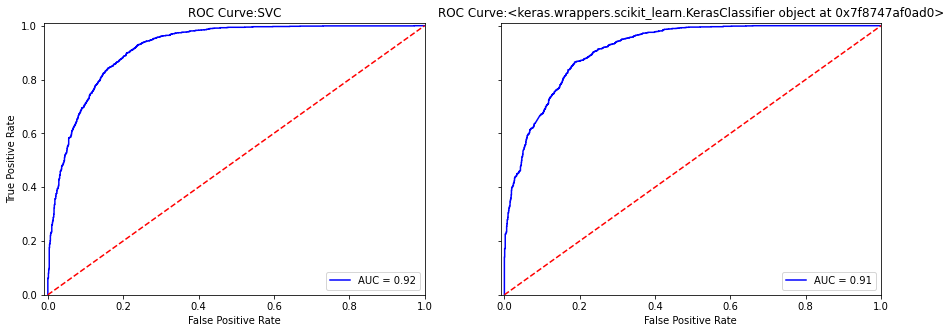

In [ ]:
cls = [SVM_tuned, NN_tuned]

fig, axs = plt.subplots(nrows=1, ncols=len(cls), figsize=(15, 5), sharex=True, sharey=True)

# Plot ROC Curves
for i in range(len(cls)):
  y_scores = cls[i].predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)

  axs[i].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  axs[i].legend(loc = 'lower right')
  axs[i].plot([0, 1], [0, 1],'r--')
  plt.xlim([-.01, 1])
  plt.ylim([0, 1.01])
  axs[i].set_title(f"ROC Curve:{str(cls[i][1]).partition('(')[0]}")

axs[0].set_ylabel('True Positive Rate')
axs[0].set_xlabel('False Positive Rate')
axs[1].set_xlabel('False Positive Rate')
plt.show()

### 6.2 Examining Over-Fitting
One indication of an overfit model lies in the training, validation, and test scores. If the training and validation scores of our model are significantly higher than the scores we produce after testing on our holdout validation set, that is a clear sign that our model may have overfit. 

As seen in our score analysis above, our scores between outer cross-validation, refitting, and final test remain reasonably consistent. Cross Fold Validation, a common process that we trained both of our models through, helped prevent overfitting in several ways. First, cross-fold validation with grid search helps find parameters by training and comparing average scores for different selections of data. When refitting outside of the grid-search process, cross-fold validation allows us to obtain a more accurate model score by training and testing different folds of data. 

The grid-search cross-fold validation process also has an additional benefit to models such as support vector machines. It evaluates parameters on folds of data that may or may not contain the same support vectors and vectors inside the model's margins, helping to generalize. 

SVMs also allow us to view our model's support vectors in an array. This helps examine overfitting as we can draw on the proportion of support vectors to input vectors as a measure of fitness. A large proportion of support vectors—points that lie on or within the margins of our hyperplane—would lead us to conclude that the model is overfit. We find below that 37% of our training data points are support vectors which, while high, seems reasonable considering the final test score and the understanding that our dataset appears fairly noisy.

In [ ]:
SVM_train_v = X_train.shape[0]
SVM_support_v = SVM_tuned.named_steps["model"].n_support_

support_percent = np.around((sum(SVM_support_v)/SVM_train_v)*100, decimals=2)

print(f'Number of Training vectors: {SVM_train_v}')
print(f'Number of support vectors in each class: {SVM_support_v}')
print(f'Classes: {SVM_tuned.named_steps["model"].classes_}')

print('')
print(f'% of Training Vectors used as Support Vectors: {support_percent}%')
# SVM_tuned.named_steps['model'].n_support_

Number of Training vectors: 10700
Number of support vectors in each class: [1989 1984]
Classes: [0 1]

% of Training Vectors used as Support Vectors: 37.13%


We may also evaluate potential overfitting by examining the learning curves of our models. In the case of overfitting, we would expect our learning curves to exhibit significant differences between training and validation scores--high training scores that are unable to be met by the validation scores.

Neither our SVM nor our neural net show signs of overfitting according to our learning curves.

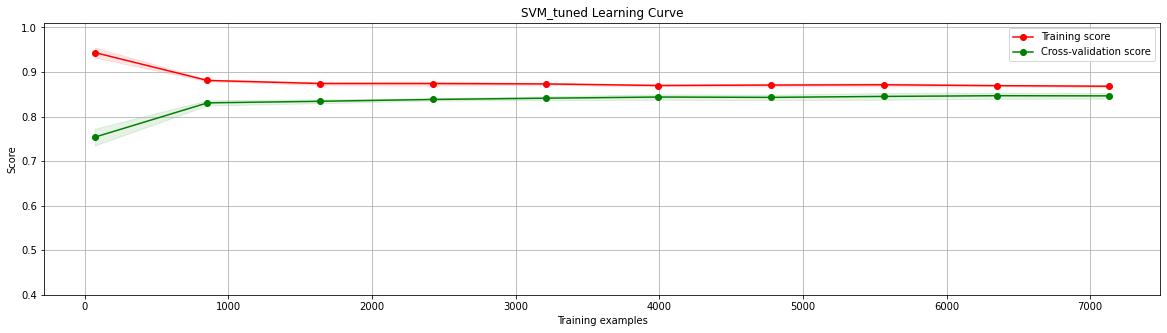

In [ ]:
# Plot
plot_learning_curve(SVM_tuned, 
                    'SVM_tuned Learning Curve', 
                    X_train, 
                    y_train, 
                    ylim=(0.4, 1.01),
                    train_sizes=np.linspace(0.01, 1.0, 10), 
                    cv=cv_inner, 
                    n_jobs=4)

plt.show()

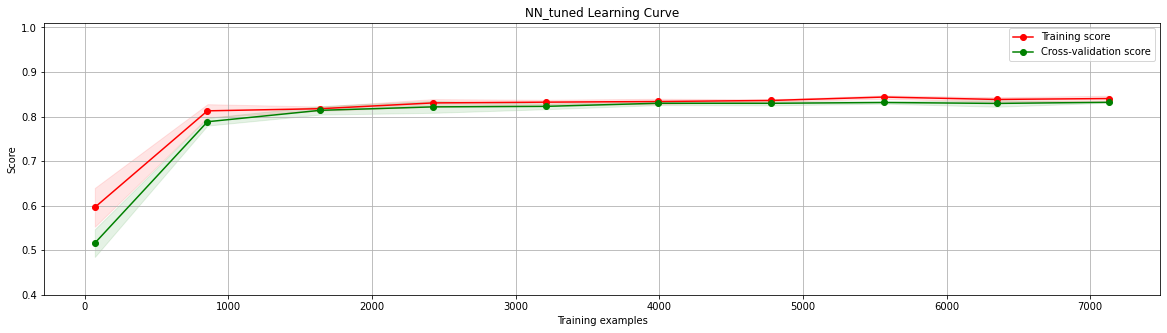

In [ ]:
plot_learning_curve(NN_tuned, 
                    'NN_tuned Learning Curve', 
                    X_train, 
                    y_train, 
                    ylim=(0.4, 1.01),
                    train_sizes=np.linspace(0.01, 1.0, 10), 
                    cv=cv_inner, 
                    n_jobs=4)

plt.show()

## <b>7. Final Recommendation: Best Model - Neural Network<b>

### 7.1 Model Selection 
While we are inclined to select our Support Vector Machine model for its relative simplicty, interpritability, and competitive scoring, we recommend the Neural Network for the ATGPP's particular use-case. We discuss the decision in more detail below, but came to this conclusion with consideration for the similar scores between our SVM and neural net and the flexability the neural net offers over the SVM in terms of adjusting the model's classification probability threshold.

### 7.2 Technical Results
*Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency (4 marks)*
<br /><br />
As discussed in section 6.2, neither of our models appear overfit or, at least, significantly overfit. The scores between training, validation, and testing remain consistent, and our learning curves do not indicate scoring inconsistencies during validation. 

One result we found interesting, but have yet to discuss in detail, relates to the necessary size of our dataset. Referring back to our learning curves, both models seem to converge upon their final scoring state with about half of the observations we input. We speculate that reducing the size of the dataset will not negatively affect the final model, but will benefit potential future research into better network structures by reducing training times.

While our selected model, the neural network, is fairly complex to construct and is slower to train, by comparison to the SVM, it trains through cross-validation in a reasonable amount of time, even when using the full data set. Reducing the number of data points for future research into better layer structures would, however, inevitably reduce cumulative training time. Regardless, we are uncertain if a more thoroughly researched neural network would perform much better given the noisiness of the data and similar SVM results. We can, instead, potentially rely on adjusting the probability thresholds for more nuanced results from our current model.

### 7.2 Business Results
*Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective (4 marks)*
<br /><br />
We had originally set out to meet the ATGPP's minimum requirements for a model that accepts background events misclassified as signal—a threshold of .2. We have met that goal and, in the process of prototyping and researching models, we have also found a way to reach higher tolerances for some of their more delicate experiments.

Our core neural network model meets the threshold for their least sensitive experiments, with a positive-class precision of .81—indicating that less than 20% of predictions from our model are false positives. Using our neural net and altering the probability threshold for the class predictions, the ATGPP can attain higher rates of precision for experiments that require greater purity in the positive class predictions—0.01, 0.02, 0.05, 0.1. This option, however, will come at the cost of a higher rate of false negatives. 

Future research into different model parameters and layer structures potentially offers room for improvement. The additional prospect to significantly reduce the number of necessary observations to retrain new models, as the ATGPP collets new data or adjust their requirements, means that future updates to the model may take even less time than our initial research.

Given the competitive performance of each candidate model, we selected our final candidate, the Neural Network, with the flexibility our customer may need to approach their more sensitive experiments in mind.

## <b>8. Conclusion</b>

### 8.1 Accomplishments
Our final model succeeded in meeting the goal that we set in our case study—a goal mentioned in the dataset's accompanying materials—though the margin is slim. A precision of .82 just meets the threshold indicated by our case study as of minimal usefulness. We did, however, also theoretically meet the other stated thresholds for our customer's experiments, though at an expense. Fortunately, our selected dataset was not accompanied by theoretical requirements for false negatives or other rates. Regardless, we succeeded in training a model that performs in the 80-90% range on all metrics with built-in flexibility should adjustments be required. 

Although we selected our neural network as the final model, I also consider the SVM a success in meeting the goal we set. It is not only a more simple, computationally less expensive model to train, but also more easily interpretable, especially considering we can view the support vectors. It fails in the reliability of the available probability predictions and, by extension, flexibility for our use-case. 

I consider our implementation of techniques to prevent overfitting on both models a success—cross-fold validation, regularization, and dropout. Our models do not exhibit signs of significant overfitting.

Building the neural net's layer structure, we encountered issues when adding additional dropout layers. Seemingly random cross-fold validation scores would register 0, affecting our averages. One success I had was in constructing a method to save various grid search cross-validation test scores for later analysis. Unfortunately, other than isolating the extra dropout layers as the root cause, we could not identify a more definitive cause for the discrepancies. Our best theory is that the loss of certain node patterns may have been too significant for our model to score correctly. 

Generally, I would say we fell short of finding a model that could separate the signal from the noise to a higher standard than the bare minimum requested by the case study. While we found what I would consider a work-around, I had hoped for higher scores across all of our metrics.

### 8.2 Reflection
Reflecting back on the analysis above, I would have liked to make time for a third, functionally different model than SVM or Neural Networks. Our studies into probabilistic models piqued my interest, but I am not convinced this dataset called for such techniques over SVM or neural nets. I would have liked to approach the possibility that my assumptions were incorrect.

I would have also liked to address the learning curve discussion earlier in my process. I looked into learning curves as part of my research too late, in my opinion, to utilize and assess them to their full potential. The insight that different forms of learning curves offer would have helped structure my analysis better and inform how I built my models. Checking learning curves earlier into my analysis, during the prototyping phase, for example, would have left me more time to experiment with smaller samples of data. 

On that note, the final change I would have made to my analysis includes experimenting with different samples sizes early into my process. More data is not always better and I think this project could have benefited from a less-is-more approach. 

### 8.3 Future Work
Future work that I would like to perform includes:

* **Multiclass/Regression Techniques** - When I set out to begin this project, my original intent was to find an interesting dataset suited for multiclass classification or regression problems. Although I respect the importance of binary classification, I had hoped to find a different problem. Regardless, I selected this dataset primarily because I found the subject matter and the problem itself engaging. 

* **2-Model Problem Solving** - One strategy I am curious to attempt is to build two models—one with strong precision performance--as this case study called for-- and one with strong recall and passing data through both. First, the precision model, then the recall model, in an attempt to secure overall better scores.

* **Advanced GridsearchCV Research** - In solving one problem--long runtimes for models in GridSearchCV with a large search space--I generated separate datasets of parameters and cross-validation scores that I think would be interesting to explore in more depth. How can that data better inform how we structure successive iterations of neural networks on a dataset?

* **Model Saving** - Simply saving a model is easy. The problem becomes more complicated when we want to save a fit grid that includes a pipeline and scikit-learn Keras wrapper containing a sequential model object. I came close to a fairly simple saving method that involved splitting the pipeline from the model and saving them separately--recombining on load. However, I ran out of time before completely understanding how to accomplish saving everything to file fully. The ability to save these objects to file would help reduce the time it takes to experiment and prototype these models, and I would like to explore the idea further.


## <b>9. Citations</b>
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [ http://archive.ics.uci.edu/ml ]. Irvine, CA: University of California, School of Information and Computer Science.